Привет, Александр!

Меня зовут Вячеслав Погорелый, и я буду проводить ревью твоего проекта. 

Предлагаю перейти на "ты", если не против)

Но если это не удобно - дай знать, и мы перейдем на "вы". Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Я отметил комментарии и замечания разным цветом далее по тексту markdown:

---    
<div class="alert alert-block alert-danger">
    
### Ошибка
    
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
    
### Совет
    
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
    
### Успех
    
Когда всё сделано правильно.
</div>
    
    
    
Будет здорово, если для ответов ты выберешь любой **<font color="maroon">читабельный и заметный цвет</font>**, так мне будет проще все проверить.


При доработке проекта попрошу тебя сохранить и не видоизменять заметки ревьюера, это осложняет повторную проверку.

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Спасибо тебе за оформление оглавления к проекту. 

### Откройте файл с данными и изучите общую информацию

In [1]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [2]:
df = pd.read_csv(r"C:\Users\Aleksandr\Downloads\real_estate_data.csv", sep="\t")
#df = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")
print(f'Shape data is {df.shape}')

Shape data is (23699, 22)


In [3]:
df.head(5)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1          11.0      2.0   посёлок Шушары           12817.0   
2           8.3      0.0  Санкт-Петербург           21741.0   
3           NaN      0.0  Санкт-Петербург           28098.0   
4          41.0      NaN  Санкт-Петербург           31856.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  

[5 rows x 22 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Первичная информация о данных получена

In [5]:
df.describe().T

count          mean           std      min         25%  \
total_images         23699.0  9.858475e+00  5.682529e+00      0.0        6.00   
last_price           23699.0  6.541549e+06  1.088701e+07  12190.0  3400000.00   
total_area           23699.0  6.034865e+01  3.565408e+01     12.0       40.00   
rooms                23699.0  2.070636e+00  1.078405e+00      0.0        1.00   
ceiling_height       14504.0  2.771499e+00  1.261056e+00      1.0        2.52   
floors_total         23613.0  1.067382e+01  6.597173e+00      1.0        5.00   
living_area          21796.0  3.445785e+01  2.203045e+01      2.0       18.60   
floor                23699.0  5.892358e+00  4.885249e+00      1.0        2.00   
kitchen_area         21421.0  1.056981e+01  5.905438e+00      1.3        7.00   
balcony              12180.0  1.150082e+00  1.071300e+00      0.0        0.00   
airports_nearest     18157.0  2.879367e+04  1.263088e+04      0.0    18585.00   
cityCenters_nearest  18180.0  1.419128e+04  8.608386e+03    181.0     9238.00   
parks_around3000     18181.0  6.114075e-01  8.020736e-01      0.0        0.00   
parks_nearest         8079.0  4.908046e+02  3.423180e+02      1.0      288.00   
ponds_around3000     18181.0  7.702547e-01  9.383456e-01      0.0        0.00   
ponds_nearest         9110.0  5.179809e+02  2.777206e+02     13.0      294.00   
days_exposition      20518.0  1.808886e+02  2.197280e+02      1.0       45.00   

                            50%        75%          max  
total_images               9.00       14.0         50.0  
last_price           4650000.00  6800000.0  763000000.0  
total_area                52.00       69.9        900.0  
rooms                      2.00        3.0         19.0  
ceiling_height             2.65        2.8        100.0  
floors_total               9.00       16.0         60.0  
living_area               30.00       42.3        409.7  
floor                      4.00        8.0         33.0  
kitchen_area               9.10       12.0        112.0  
balcony                    1.00        2.0          5.0  
airports_nearest       26726.00    37273.0      84869.0  
cityCenters_nearest    13098.50    16293.0      65968.0  
parks_around3000           0.00        1.0          3.0  
parks_nearest            455.00      612.0       3190.0  
ponds_around3000           1.00        1.0          3.0  
ponds_nearest            502.00      729.0       1344.0  
days_exposition           95.00      232.0       1580.0

In [6]:
print('Название всех колонок данных:')
print(*df.columns, sep =", ")

Название всех колонок данных:
total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition


<class 'matplotlib.axes._axes.Axes'>


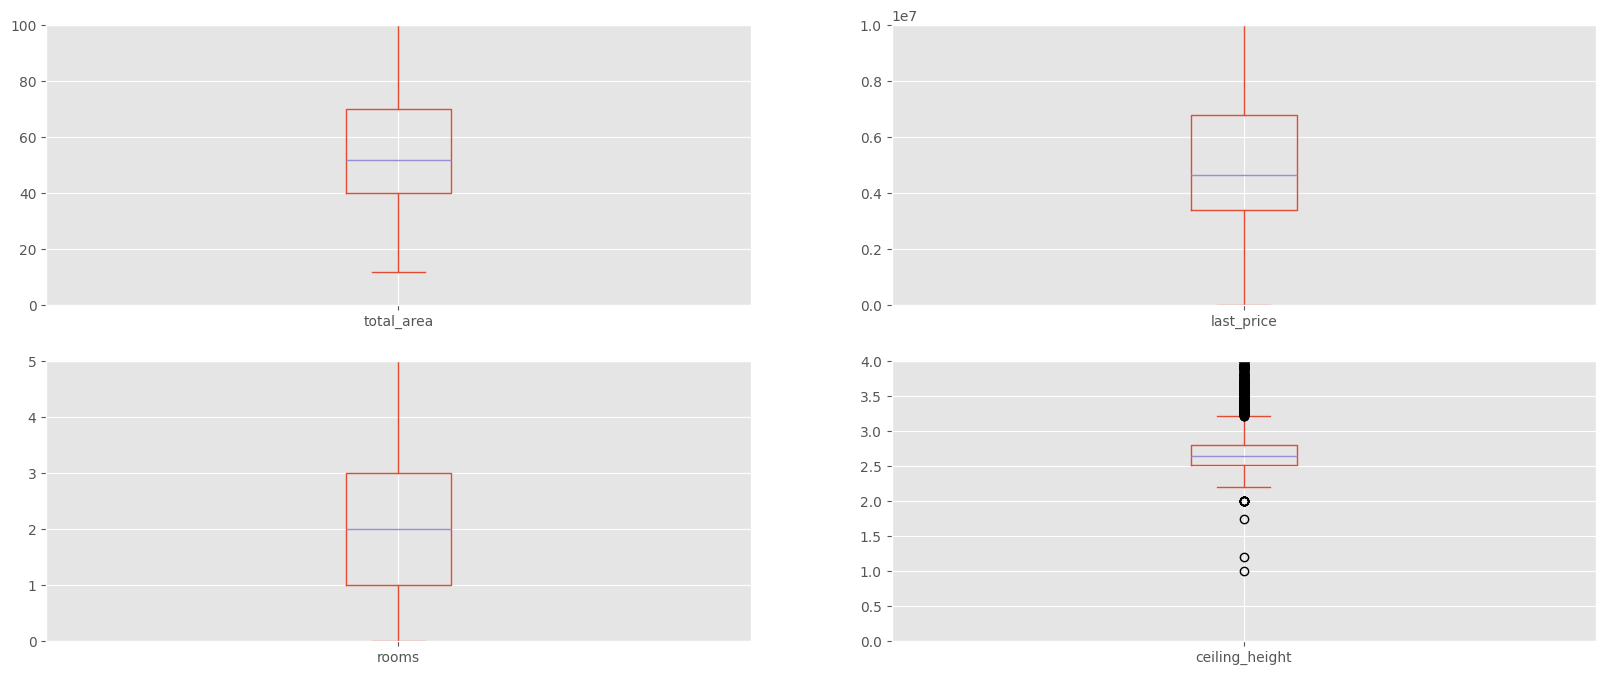

In [7]:
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
ax = df[column_list].plot(kind='box', subplots=True, layout=(2,2), figsize=(20,8))
print(type(ax['rooms']))
ylims = [100, 10000000, 5, 4]

for i in range(len(column_list)):
    ax[column_list[i]].set_ylim(0, ylims[i])

<class 'matplotlib.axes._axes.Axes'>


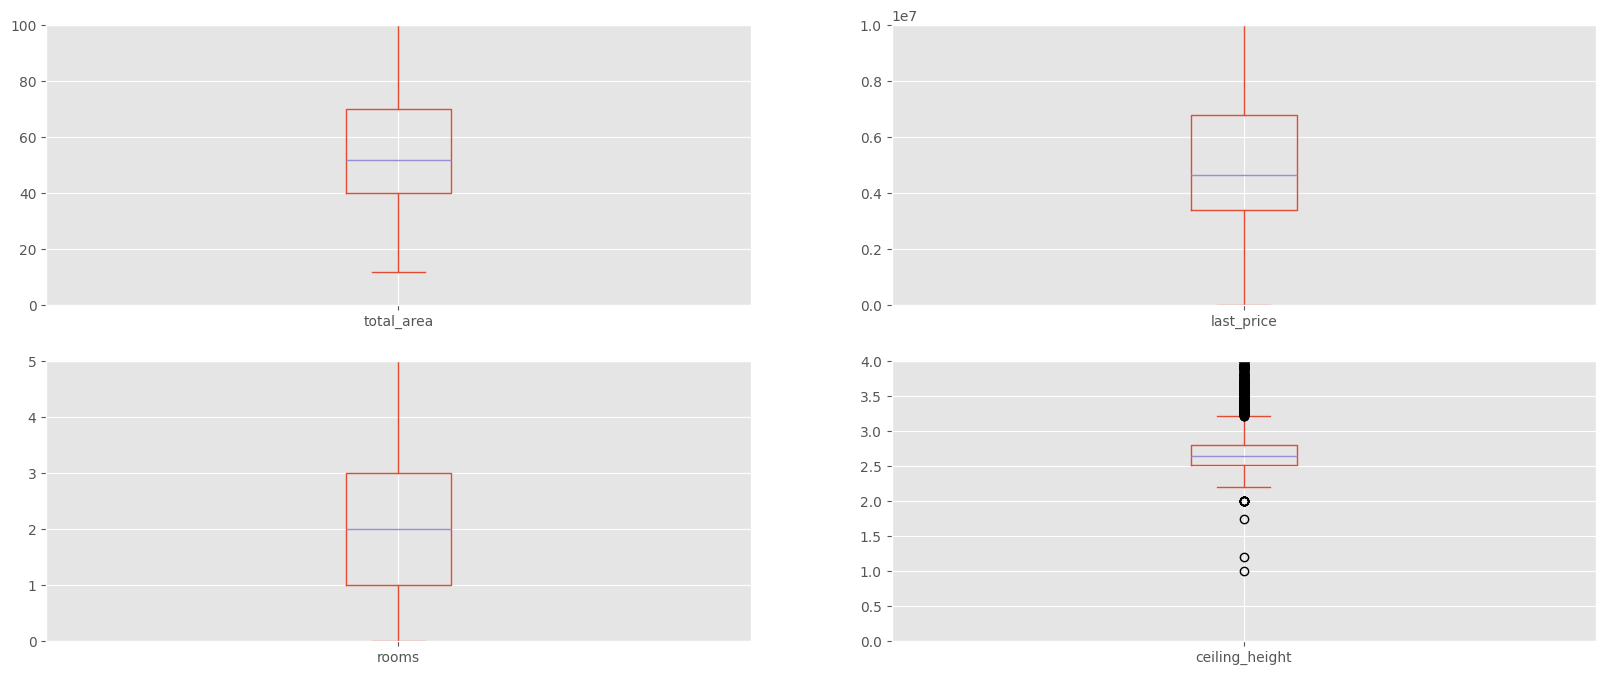

In [8]:
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
kinds = ['box', 'bar', 'barh', 'box']
ax = df[column_list].plot(kind=kinds.pop(), subplots=True, layout=(2,2), figsize=(20,8))
print(type(ax['rooms']))
ylims = [100, 10000000, 5, 4]

for i in range(len(column_list)):
    ax[column_list[i]].set_ylim(0, ylims[i])

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Классный метод визуализации используешь. 

Распределение всех числовых данных:


<Figure size 800x640 with 0 Axes>

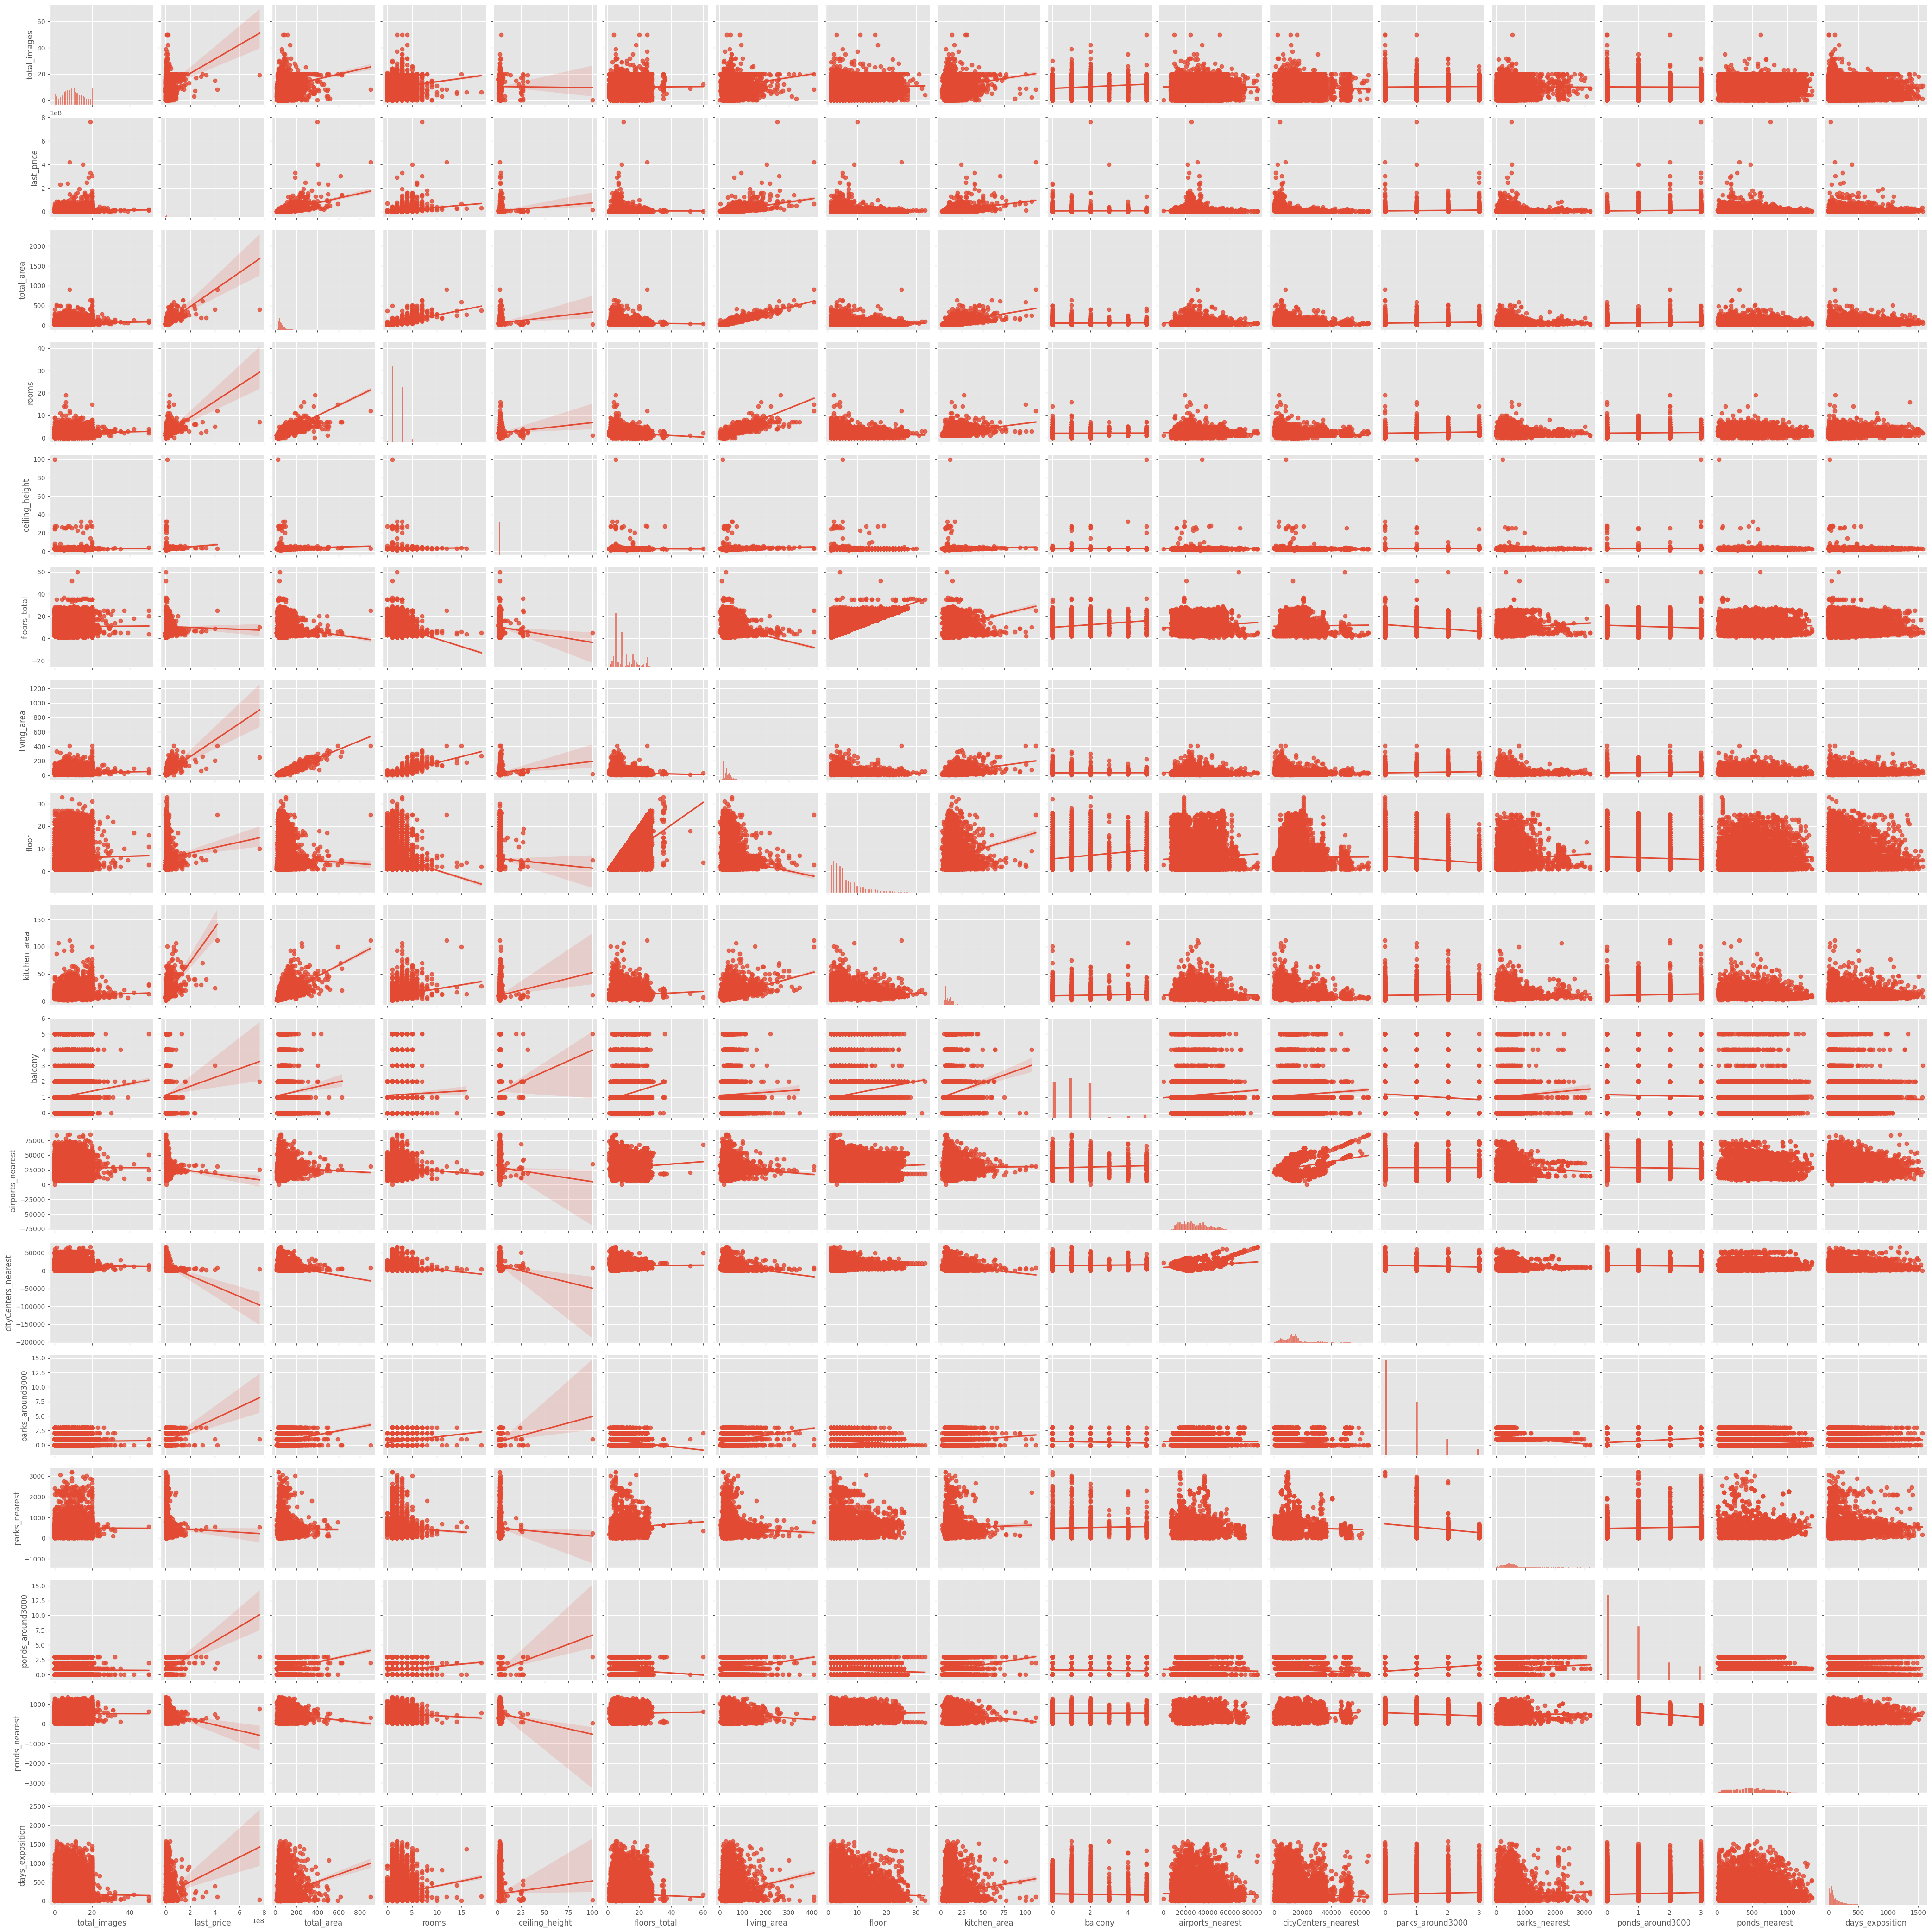

In [9]:
print('Распределение всех числовых данных:')
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df.select_dtypes(include=[np.number]), kind="reg")
plt.show()

**Гипотеза: Много несбалансированных данных**

Распределение всех числовых данных:


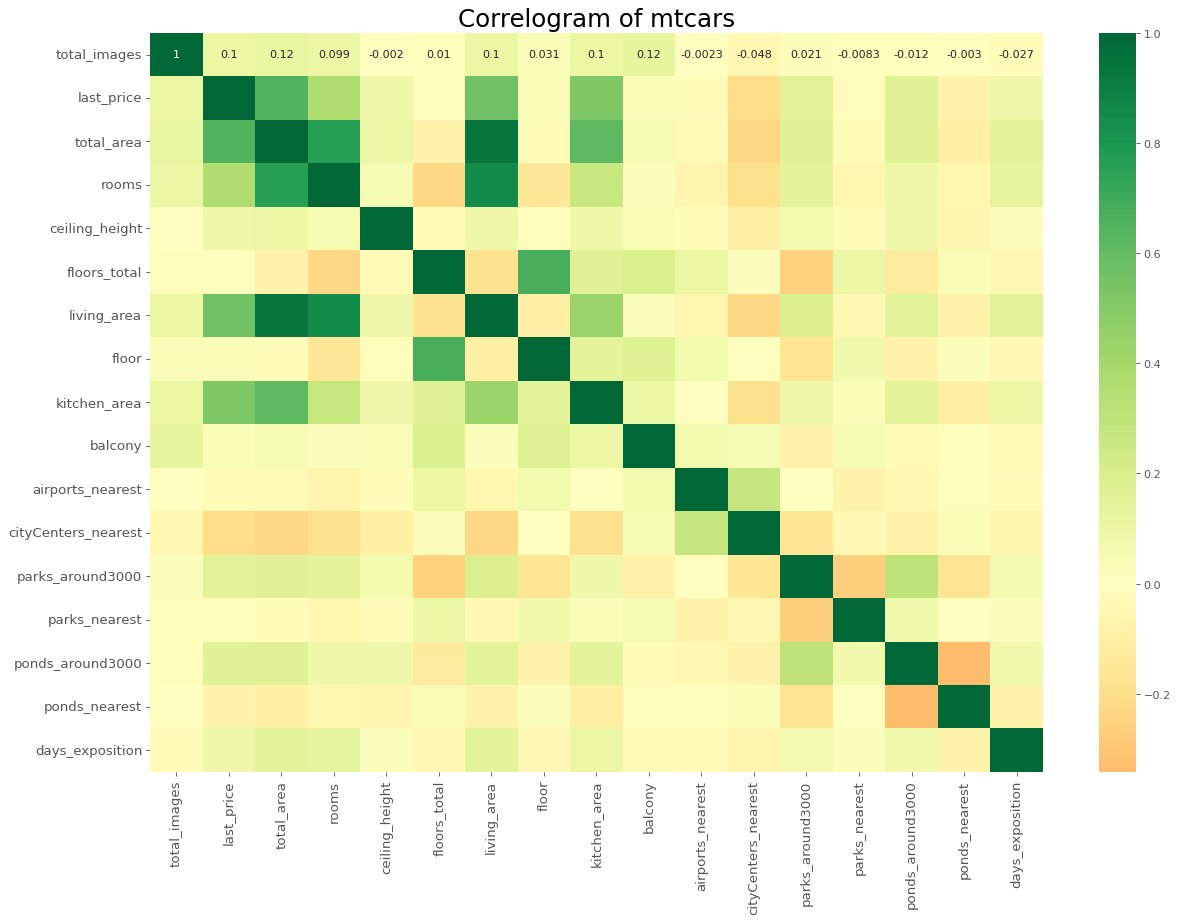

In [12]:
print('Распределение всех числовых данных:')
 
plt.figure(figsize=(18,12), dpi= 80)
sns.heatmap(df.select_dtypes(include=[np.number]).corr(),
            xticklabels=df.select_dtypes(include=[np.number]).corr().columns,
            yticklabels=df.select_dtypes(include=[np.number]).corr().columns, 
            cmap='RdYlGn',
            center=0,
            annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Не хватает только промежуточного вывода по итогу знакомства с данными. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера ver.2 
    
#### Успех
    
Здорово вышло

**Исправление ошибки: Вывод - Заметили следующее:**

1. first_day_exposition - object - должен быть тип datetime
2. ceiling_height - нулевые значения
3. floors_total - должен быть тип int, т.к. количество этажей - целое значение + нулевые значения
4. is_apartment - должен быть тип bool + нулевые значения
5. living_area - нулевые значения
6. kitchen_area - нулевые значения
7. balcony - нулевые значения
8. locality_name - нулевые значения
9. airports_nearest - нулевые значения
10. cityCenters_nearest - нулевые значения
11. parks_around3000 - тип должен быть int + нулевые значения
12. parks_nearest - нулевые значения
13. ponds_around3000 - тип должен быть int + нулевые значения
14. ponds_nearest - нулевые значения
15. days_exposition - тип должен быть int + нулевые значения**

**Данные разного типа. Данные разных форматов, отражающие все грани рынка недвижимости** 

### Выполните предобработку данных

In [11]:
print('Количество пропущенных значений:')

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Количество пропущенных значений:
total_images - 0%
last_price - 0%
total_area - 0%
first_day_exposition - 0%
rooms - 0%
ceiling_height - 39%
floors_total - 0%
living_area - 8%
floor - 0%
is_apartment - 88%
studio - 0%
open_plan - 0%
kitchen_area - 10%
balcony - 49%
locality_name - 0%
airports_nearest - 23%
cityCenters_nearest - 23%
parks_around3000 - 23%
parks_nearest - 66%
ponds_around3000 - 23%
ponds_nearest - 62%
days_exposition - 13%


**Много пропущенных значений, есть 5 столбцов, где процент содержания NaN крайне велик (от 39% и до 88%)**
   1. is_apartment,
   2. parks_nearest, 
   3. balcony, 
   4. ceiling_height,
   5. ponds_around3000, ponds_around3000
   6. days_exposition. 
   


**Причин тут много, глобальных выделяют несколько:**
1. Ошибки при регистрации владельцев недвижимости (человеческий фактор)
2. Не подтвержденность той или иной инфориации со стороны владельца базы данных
3. Ошибки при миграции данных из SQL формата в csv и.т.д.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
С причинами согласен. Могло так и быть

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для визуализации пропусков можешь использовать такой метод https://russianblogs.com/article/5001266235/

**Отобразим наши данные**

In [12]:
! pip install missingno
 
import missingno as msno

<Axes: >

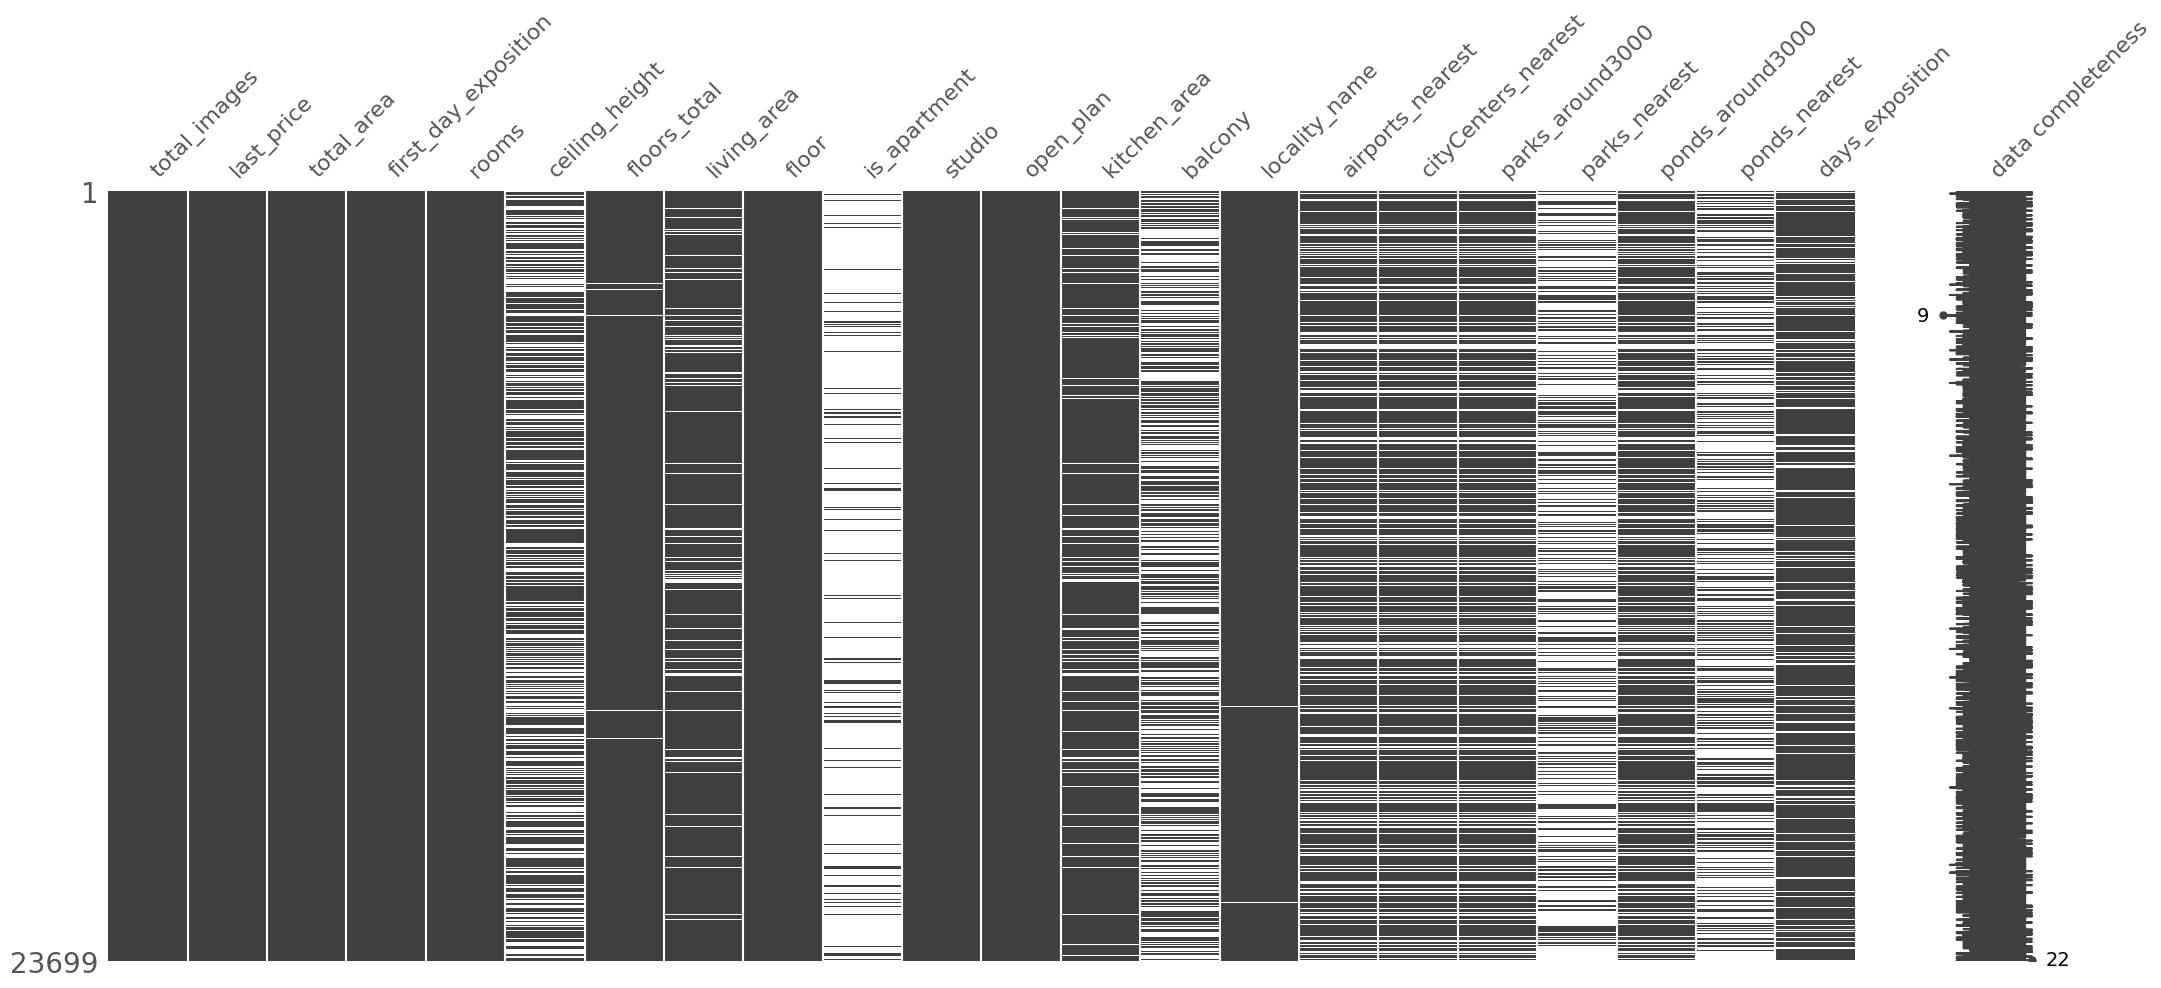

In [13]:
msno.matrix(df, labels=True)

**Здесь наглядно показаны все наши пропуски данных**

<Axes: >

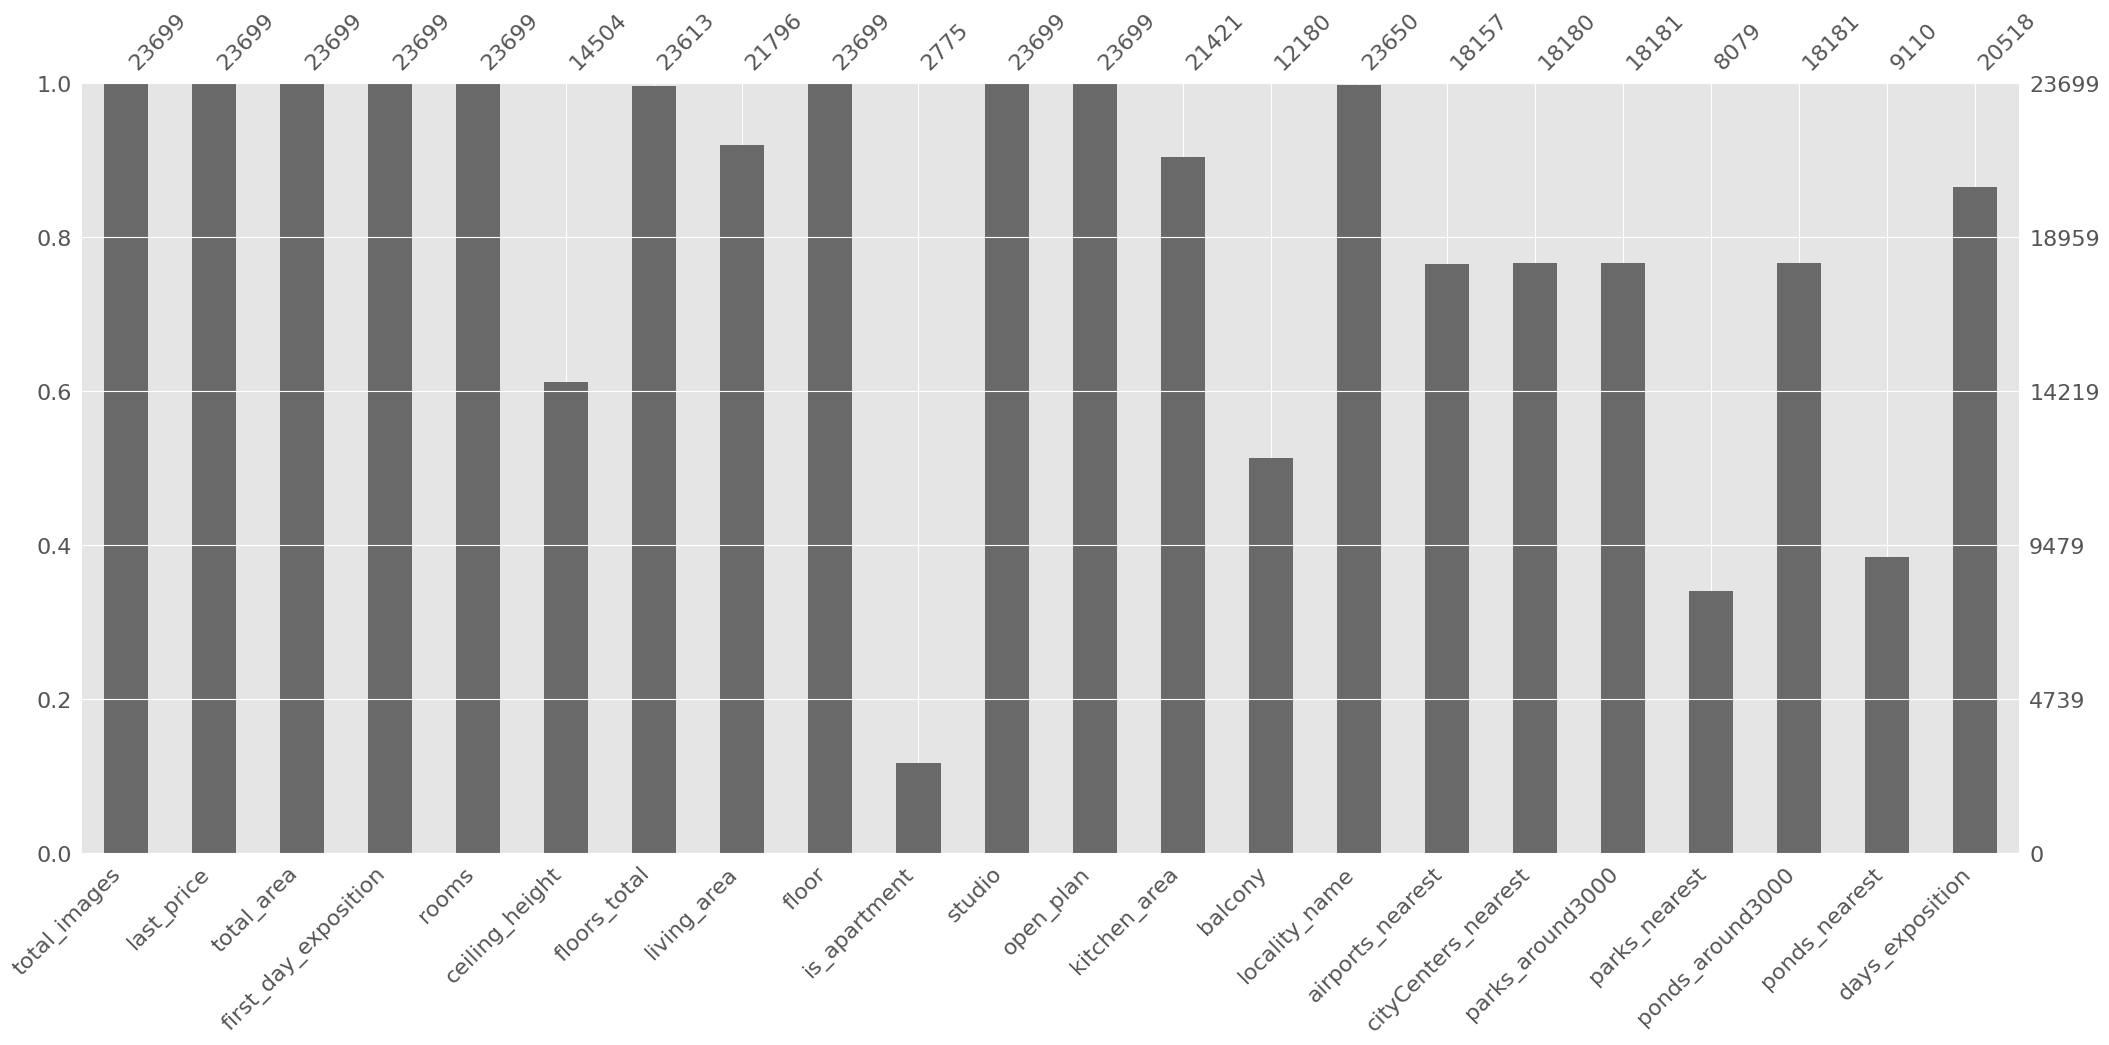

In [14]:
msno.bar(df)

**Как говорилось ранее, топ 5 по пропускам наглядно отображен**

**Класс IterativeImputer библиотеки sklearn реализует многомерные алгоритмы восстановления пропущенных значений, оценивая другие значения в наборе. Данный класс моделирует каждый признак пропущенного значения как функцию от других признаков и использует оценку для замены значений. IterativeImputer фактически итеративно строит модель регрессии, используя подмножества столбцов для прогнозирования отсутствующих значений.**

In [15]:
new_data = df.select_dtypes(include=[np.number,'bool'])

X = new_data.copy(deep = True) #создаем копию датасета

# импортируем библиотеку

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

# определяем импортер

myImputer=IterativeImputer()

# устанавливаем imputer на X

myImputer.fit(X) 

#получаем восстановленные данные

myImputer_data = myImputer.transform(X)

# полученные данные преобразовываем в DataFrame

myImputer_data = pd.DataFrame(myImputer_data,columns = new_data.columns)

In [16]:
myImputer_data.head(5)

total_images  last_price  total_area  rooms  ceiling_height  floors_total  \
0          20.0  13000000.0       108.0    3.0        2.700000          16.0   
1           7.0   3350000.0        40.4    1.0        2.693798          11.0   
2          10.0   5196000.0        56.0    2.0        2.818506           5.0   
3           0.0  64900000.0       159.0    3.0        3.413105          14.0   
4           2.0  10000000.0       100.0    2.0        3.030000          14.0   

   living_area  floor  studio  open_plan  kitchen_area   balcony  \
0    51.000000    8.0     0.0        0.0     25.000000  1.640368   
1    18.600000    1.0     0.0        0.0     11.000000  2.000000   
2    34.300000    4.0     0.0        0.0      8.300000  0.000000   
3    93.216178    9.0     0.0        0.0     23.187395  0.000000   
4    32.000000   13.0     0.0        0.0     41.000000  1.288388   

   airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0           18863.0              16028.0               1.0     482.000000   
1           12817.0              18603.0               0.0     690.536699   
2           21741.0              13933.0               1.0      90.000000   
3           28098.0               6800.0               2.0      84.000000   
4           31856.0               8098.0               2.0     112.000000   

   ponds_around3000  ponds_nearest  days_exposition  
0               2.0     755.000000       209.050485  
1               0.0     698.581926        81.000000  
2               2.0     574.000000       558.000000  
3               3.0     234.000000       424.000000  
4               1.0      48.000000       121.000000

In [17]:
myImputer_data.shape

(23699, 19)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Вот здесь выше всяких похвал. Отлично

**Наши данные готовы, начнем сравнивать**

In [18]:
print(f'Уникальные значения is_apartment :{df.is_apartment.unique()}')
print(f'Количество NaN в столбце is_apartment: {df["is_apartment"].isnull().sum()}')

Уникальные значения is_apartment :[nan False True]
Количество NaN в столбце is_apartment: 20924


**Заполнять пропуски значением False не будем,поскольку тогда во всём датафрейме (>20000 строк) всего 50 апартаментов. Из открытой статистики мы знаем долю апартаментов это 23%.Отдадим все рандомайзеру**

In [19]:
print(f'Количество NaN в столбце is_apartment: {df["is_apartment"].isnull().sum()}')
m = df['is_apartment'].isna()
df.loc[m, 'is_apartment'] = np.random.choice(df.loc[~m, 'is_apartment'], m.sum())
print(f'Количество NaN в столбце is_apartment, после заполнения: {df["is_apartment"].isnull().sum()}')

Количество NaN в столбце is_apartment: 20924
Количество NaN в столбце is_apartment, после заполнения: 0


In [20]:
print(f'Уникальные значения is_apartment :{df.is_apartment.unique()}')
print(f'Уникальные значения is_apartment :{df.is_apartment.value_counts(dropna=False)}')

Уникальные значения is_apartment :[False True]
Уникальные значения is_apartment :is_apartment
False    23293
True       406
Name: count, dtype: int64


**Ну почти=)**

In [21]:
# df['balcony'] = myImputer_data['balcony']
# df['ceiling_height'] = myImputer_data['ceiling_height']
# df['parks_nearest'] = myImputer_data['parks_nearest']
# df['ponds_around3000'] = myImputer_data['ponds_around3000']
# df['parks_around3000'] = myImputer_data['parks_around3000']
# df['days_exposition'] = myImputer_data['days_exposition']
# df['cityCenters_nearest'] = myImputer_data['cityCenters_nearest']
# df['airports_nearest'] = myImputer_data['airports_nearest']
# df['ponds_nearest'] = myImputer_data['ponds_nearest']
# df['kitchen_area'] = myImputer_data['kitchen_area']
# df['living_area'] = myImputer_data['living_area']

list_of_nan = df.select_dtypes(include=[np.number,'bool']).columns
for i in list_of_nan:
    df[i] = myImputer_data[i]
df.shape

(23699, 22)

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
В идеале тут можно было проработать через цикл. 

**Исправил цикл**

In [22]:
print('Количество пропущенных значений после обработки:')

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Количество пропущенных значений после обработки:
total_images - 0%
last_price - 0%
total_area - 0%
first_day_exposition - 0%
rooms - 0%
ceiling_height - 0%
floors_total - 0%
living_area - 0%
floor - 0%
is_apartment - 0%
studio - 0%
open_plan - 0%
kitchen_area - 0%
balcony - 0%
locality_name - 0%
airports_nearest - 0%
cityCenters_nearest - 0%
parks_around3000 - 0%
parks_nearest - 0%
ponds_around3000 - 0%
ponds_nearest - 0%
days_exposition - 0%


**В зависимости от задачи используется тот или иной метод заполнения отсутствующих элементов, это может быть нулевое значение, математическое ожидание, медиана и т.п. Для замены NaN элементов на конкретные значения, можно использовать интерполяцию, которая реализована в методе interpolate().В нашем случае в числовых данных есть выбросы и сами данные на визуализации выглядят разрозненно. Нужно смотреть нехарактерные данные.https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html Я предпочел пакетную обработку, для данной задачи**

In [23]:
df['is_apartment'] = df['is_apartment'].astype(int)
df['studio'] = df['studio'].astype(int)
df['open_plan'] = df['open_plan'].astype(int)

print(f'Уникальные значения is_apartment :{df.is_apartment.unique()}')
print(f'Уникальные значения studio :{df.studio.unique()}')
print(f'Уникальные значения open_plan :{df.open_plan.unique()}')

Уникальные значения is_apartment :[0 1]
Уникальные значения studio :[0 1]
Уникальные значения open_plan :[0 1]


**Изменен тип данных с True и False, на 0 и 1 для удобности**

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Да, так реально будет лучше

In [24]:
print(f'Уникальные значения locality_name :{df.locality_name.unique()}')

Уникальные значения locality_name :['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск

In [25]:
df['locality_name'] = df['locality_name'].str.lower()
print('Явные дубликаты', df.duplicated().sum())

Явные дубликаты 0


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
С Явными дублями справились

In [26]:
df['locality_name'] = df['locality_name'].str.replace('  ', ' ') 
df['locality_name'] = df['locality_name'].str.replace('--', '-') 
df['locality_name'] = df['locality_name'].str.replace('.', '') 
df['locality_name'] = df['locality_name'].str.replace(',', '') 
print(f'Уникальные значения locality_name :{df.locality_name.unique()}')

Уникальные значения locality_name :['санкт-петербург' 'посёлок шушары' 'городской посёлок янино-1'
 'посёлок парголово' 'посёлок мурино' 'ломоносов' 'сертолово' 'петергоф'
 'пушкин' 'деревня кудрово' 'коммунар' 'колпино'
 'поселок городского типа красный бор' 'гатчина' 'поселок мурино'
 'деревня фёдоровское' 'выборг' 'кронштадт' 'кировск'
 'деревня новое девяткино' 'посёлок металлострой'
 'посёлок городского типа лебяжье' 'посёлок городского типа сиверский'
 'поселок молодцово' 'поселок городского типа кузьмоловский'
 'садовое товарищество новая ропша' 'павловск' 'деревня пикколово'
 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк'
 'деревня куттузи' 'посёлок аннино' 'поселок городского типа ефимовский'
 'посёлок плодовое' 'деревня заклинье' 'поселок торковичи'
 'поселок первомайское' 'красное село' 'посёлок понтонный' 'сясьстрой'
 'деревня старая' 'деревня лесколово' 'посёлок новый свет' 'сланцы'
 'село путилово' 'ивангород' 'мурино' 'шлиссельбург' 'никольское'
 'зеленогорск

**Подстрахуюсь, сделаю нижний регистр, прочешу повторы знаков**

**Асимметричные данные можно корректировать с помощью медианы и IQR.**

In [27]:
df.select_dtypes(include=[np.number]).columns

Index(['total_images', 'last_price', 'total_area', 'rooms', 'ceiling_height',
       'floors_total', 'living_area', 'floor', 'is_apartment', 'studio',
       'open_plan', 'kitchen_area', 'balcony', 'airports_nearest',
       'cityCenters_nearest', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'days_exposition'],
      dtype='object')

In [28]:
def outlier_removal(data , i):
    q1 = np.quantile(data[i] ,0.25)
    q3 = np.quantile(data[i] , 0.75)
    iqr = q3-q1
    lower_tail = q1 - 1.5*iqr
    upper_tail = q3 + 1.5*iqr
    data.replace(data[data[i]> upper_tail].index ,data[i].median())
    data.replace(data[data[i]< lower_tail].index ,data[i].median())
    return data

outlier_list =['total_images', 'last_price', 'total_area', 'rooms', 'ceiling_height',
       'floors_total', 'living_area', 'floor', 'is_apartment', 'studio',
       'open_plan', 'kitchen_area', 'balcony', 'airports_nearest',
       'cityCenters_nearest', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'days_exposition']

for i in outlier_list:
    outlier_removal(df , i)

print(df.shape)

(23699, 22)


In [29]:
df.head(5)

total_images  last_price  total_area first_day_exposition  rooms  \
0          20.0  13000000.0       108.0  2019-03-07T00:00:00    3.0   
1           7.0   3350000.0        40.4  2018-12-04T00:00:00    1.0   
2          10.0   5196000.0        56.0  2015-08-20T00:00:00    2.0   
3           0.0  64900000.0       159.0  2015-07-24T00:00:00    3.0   
4           2.0  10000000.0       100.0  2018-06-19T00:00:00    2.0   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0        2.700000          16.0    51.000000    8.0             0  ...   
1        2.693798          11.0    18.600000    1.0             0  ...   
2        2.818506           5.0    34.300000    4.0             0  ...   
3        3.413105          14.0    93.216178    9.0             0  ...   
4        3.030000          14.0    32.000000   13.0             0  ...   

   kitchen_area   balcony    locality_name  airports_nearest  \
0     25.000000  1.640368  санкт-петербург           18863.0   
1     11.000000  2.000000   посёлок шушары           12817.0   
2      8.300000  0.000000  санкт-петербург           21741.0   
3     23.187395  0.000000  санкт-петербург           28098.0   
4     41.000000  1.288388  санкт-петербург           31856.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0     482.000000               2.0   
1             18603.0               0.0     690.536699               0.0   
2             13933.0               1.0      90.000000               2.0   
3              6800.0               2.0      84.000000               3.0   
4              8098.0               2.0     112.000000               1.0   

   ponds_nearest  days_exposition  
0     755.000000       209.050485  
1     698.581926        81.000000  
2     574.000000       558.000000  
3     234.000000       424.000000  
4      48.000000       121.000000  

[5 rows x 22 columns]

Распределение всех числовых данных:


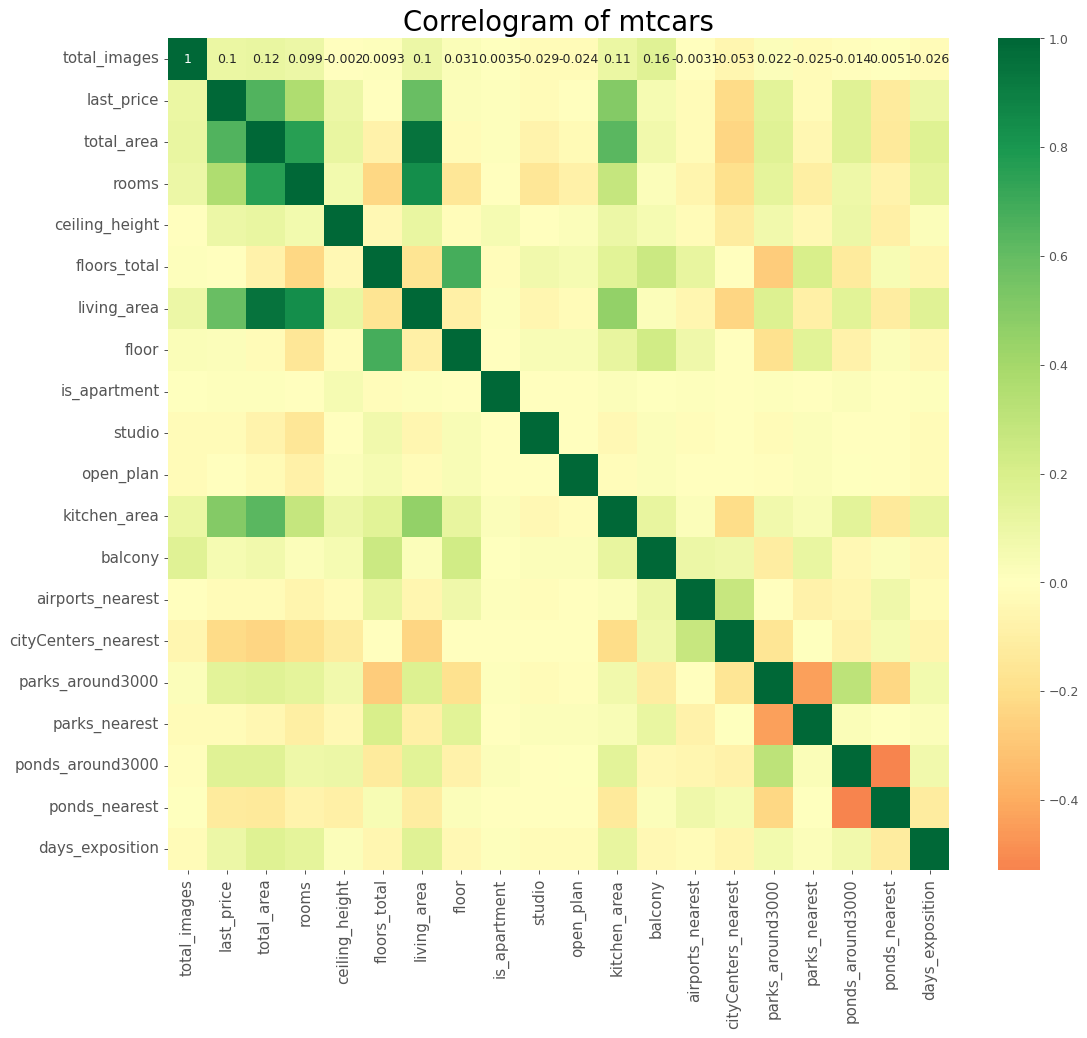

In [30]:
print('Распределение всех числовых данных:')
 
plt.figure(figsize=(14,12), dpi= 90)
sns.heatmap(df.select_dtypes(include=[np.number]).corr(),
            xticklabels=df.select_dtypes(include=[np.number]).corr().columns,
            yticklabels=df.select_dtypes(include=[np.number]).corr().columns, 
            cmap='RdYlGn',
            center=0,
            annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
На тепловых картах надо показывать данные так, чтобы они не накладывались друг на друга

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Идеально

**добавил figsize=(14,12)**

In [31]:
print(df.duplicated().value_counts())

False    23699
Name: count, dtype: int64


In [32]:
df.describe().T

count          mean           std      min  \
total_images         23699.0  9.858475e+00  5.682529e+00      0.0   
last_price           23699.0  6.541549e+06  1.088701e+07  12190.0   
total_area           23699.0  6.034865e+01  3.565408e+01     12.0   
rooms                23699.0  2.070636e+00  1.078405e+00      0.0   
ceiling_height       23699.0  2.758584e+00  9.925984e-01      1.0   
floors_total         23699.0  1.068704e+01  6.596649e+00      1.0   
living_area          23699.0  3.456065e+01  2.248179e+01      2.0   
floor                23699.0  5.892358e+00  4.885249e+00      1.0   
is_apartment         23699.0  1.713152e-02  1.297642e-01      0.0   
studio               23699.0  6.287185e-03  7.904379e-02      0.0   
open_plan            23699.0  2.827124e-03  5.309661e-02      0.0   
kitchen_area         23699.0  1.052000e+01  5.791583e+00      1.3   
balcony              23699.0  1.127997e+00  7.918363e-01      0.0   
airports_nearest     23699.0  2.875533e+04  1.107484e+04      0.0   
cityCenters_nearest  23699.0  1.441359e+04  7.569921e+03    181.0   
parks_around3000     23699.0  6.187564e-01  7.073861e-01      0.0   
parks_nearest        23699.0  5.920007e+02  2.197201e+02      1.0   
ponds_around3000     23699.0  7.673603e-01  8.238109e-01      0.0   
ponds_nearest        23699.0  6.134230e+02  1.920683e+02     13.0   
days_exposition      23699.0  1.822302e+02  2.051706e+02      1.0   

                              25%           50%           75%          max  
total_images         6.000000e+00  9.000000e+00  1.400000e+01         50.0  
last_price           3.400000e+06  4.650000e+06  6.800000e+06  763000000.0  
total_area           4.000000e+01  5.200000e+01  6.990000e+01        900.0  
rooms                1.000000e+00  2.000000e+00  3.000000e+00         19.0  
ceiling_height       2.570000e+00  2.700000e+00  2.800000e+00        100.0  
floors_total         5.000000e+00  9.000000e+00  1.600000e+01         60.0  
living_area          1.860000e+01  3.000000e+01  4.230000e+01        409.7  
floor                2.000000e+00  4.000000e+00  8.000000e+00         33.0  
is_apartment         0.000000e+00  0.000000e+00  0.000000e+00          1.0  
studio               0.000000e+00  0.000000e+00  0.000000e+00          1.0  
open_plan            0.000000e+00  0.000000e+00  0.000000e+00          1.0  
kitchen_area         7.100000e+00  9.189615e+00  1.190000e+01        112.0  
balcony              8.601881e-01  1.000000e+00  1.398374e+00          5.0  
airports_nearest     2.118300e+04  2.800882e+04  3.432700e+04      84869.0  
cityCenters_nearest  1.089400e+04  1.439800e+04  1.601821e+04      65968.0  
parks_around3000     0.000000e+00  6.222354e-01  1.000000e+00          3.0  
parks_nearest        5.389490e+02  6.200717e+02  6.805039e+02       3190.0  
ponds_around3000     0.000000e+00  7.743277e-01  1.000000e+00          3.0  
ponds_nearest        5.879699e+02  6.493516e+02  7.156814e+02       1344.0  
days_exposition      4.500000e+01  1.240000e+02  2.190000e+02       1580.0

**Провели работу:**
 1. отсутствующих данных;
 2. нетипичных данных – выбросов;
 3. неинформативных данных – дубликатов;
 4. несогласованных данных – одних и тех же данных, представленных в разных регистрах или форматах.

### Добавьте в таблицу новые столбцы

In [33]:
df['price_of_m2'] = df['last_price']/df['total_area']
print('Средняя Цена м2:',format(df['price_of_m2'].mean(), '.2f'))

Средняя Цена м2: 99421.66


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
С этим отлично вышло

**цена одного квадратного метра**

In [34]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['year'] = df['first_day_exposition'].dt.year
df['month'] = df['first_day_exposition'].dt.month
df['day'] = df['first_day_exposition'].dt.dayofweek
df.shape

(23699, 26)

 **- день публикации объявления;
    - месяц публикации объявления; 
    - год публикации объявления;**

In [35]:
df['level'] = np.where(df['floor'] == 1, 'первый', 'другой')
df['level'] = np.where(df['floor'] == df['floors_total'], 'последний', df['level'])
df.shape

(23699, 27)

**тип этажа квартиры (значения — «первый», «последний», «другой»);**

In [36]:
df['living_area_part'] = df['living_area']/df['total_area']
df['kitchen_area_part'] = df['kitchen_area']/df['total_area']
df.shape

(23699, 29)

In [37]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000
df['parks_nearest_km'] = df['parks_nearest']/1000
df['ponds_nearest_km'] = df['ponds_nearest']/1000
df['airports_nearest_km'] = df['airports_nearest']/1000

**Займемся изменением типов данных;**

In [38]:
list_numetric = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
               'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition', 'price_of_m2']

for i in list_numetric:
    df[i] = df[df[i].notnull()][i].astype('int32')#'int'

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для экономии вычислительной памяти лучше всего перевести в int32 

**Исправил**

In [39]:
list_to_round = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area', 'living_area_part', 'kitchen_area_part']
for i in list_to_round:
    df[i] = df[df[i].notnull()][i].round(2)

In [40]:
df['last_price'] = (df[df['last_price'].notnull()]['last_price']/1000*1.0).round().astype(int)
df['price_of_m2'] = (df[df['price_of_m2'].notnull()]['price_of_m2']/1000*1.0).round(3)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  float64       
 1   last_price              23699 non-null  int32         
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  float64       
 5   ceiling_height          23699 non-null  float64       
 6   floors_total            23699 non-null  int32         
 7   living_area             23699 non-null  float64       
 8   floor                   23699 non-null  float64       
 9   is_apartment            23699 non-null  int32         
 10  studio                  23699 non-null  int32         
 11  open_plan               23699 non-null  int32         
 12  kitchen_area            23699 non-null  float6

In [42]:
df.head(5)

total_images  last_price  total_area first_day_exposition  rooms  \
0          20.0       13000       108.0           2019-03-07    3.0   
1           7.0        3350        40.4           2018-12-04    1.0   
2          10.0        5196        56.0           2015-08-20    2.0   
3           0.0       64900       159.0           2015-07-24    3.0   
4           2.0       10000       100.0           2018-06-19    2.0   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  year  \
0            2.70            16        51.00    8.0             0  ...  2019   
1            2.69            11        18.60    1.0             0  ...  2018   
2            2.82             5        34.30    4.0             0  ...  2015   
3            3.41            14        93.22    9.0             0  ...  2015   
4            3.03            14        32.00   13.0             0  ...  2018   

   month  day   level living_area_part  kitchen_area_part  \
0      3    3  другой             0.47               0.23   
1     12    1  первый             0.46               0.27   
2      8    3  другой             0.61               0.15   
3      7    4  другой             0.59               0.15   
4      6    1  другой             0.32               0.41   

   cityCenters_nearest_km  parks_nearest_km  ponds_nearest_km  \
0                  16.028          0.482000          0.755000   
1                  18.603          0.690537          0.698582   
2                  13.933          0.090000          0.574000   
3                   6.800          0.084000          0.234000   
4                   8.098          0.112000          0.048000   

   airports_nearest_km  
0               18.863  
1               12.817  
2               21.741  
3               28.098  
4               31.856  

[5 rows x 33 columns]

**В таблицу добавлены новые параметры:**
    – цена одного квадратного метра;
    – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
    – месяц публикации объявления;
    – год публикации объявления;
    – тип этажа квартиры (значения — «первый», «последний», «другой»);
    – расстояние до центра города в километрах.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
С предобработкой хорошо получилось. 

### Проведите исследовательский анализ данных

In [43]:
#!pip install ydata-profiling

In [44]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(df, title='Pandas Profiling Report', progress_bar=False)
# # смотрим отчёт в HTML формате
# profile

**Яндекс не пропускает такие пакеты, т.к. большие веса, а зря**

**Приступим к детальному рассмотрению, сравнению и выдвижению гипотез**

In [45]:
df[['total_area', 'living_area',
    'kitchen_area', 'rooms',
   'last_price', 'ceiling_height', 'level',
   'floors_total','cityCenters_nearest',
   'parks_nearest']].describe().T

count          mean           std    min       25%  \
total_area           23699.0     60.348651     35.654083   12.0     40.00   
living_area          23699.0     34.560650     22.481778    2.0     18.60   
kitchen_area         23699.0     10.520003      5.791591    1.3      7.10   
rooms                23699.0      2.070636      1.078405    0.0      1.00   
last_price           23699.0   6541.548800  10887.012837   12.0   3400.00   
ceiling_height       23699.0      2.758575      0.992600    1.0      2.57   
floors_total         23699.0     10.685303      6.595760    1.0      5.00   
cityCenters_nearest  23699.0  14413.472003   7569.909971  181.0  10894.00   
parks_nearest        23699.0    591.672222    219.642831    1.0    538.00   

                          50%      75%       max  
total_area              52.00     69.9     900.0  
living_area             30.00     42.3     409.7  
kitchen_area             9.19     11.9     112.0  
rooms                    2.00      3.0      19.0  
last_price            4650.00   6800.0  763000.0  
ceiling_height           2.70      2.8     100.0  
floors_total             9.00     16.0      60.0  
cityCenters_nearest  14398.00  16018.0   65968.0  
parks_nearest          620.00    680.0    3190.0

**Существуют квартиры площадью 900 м2 и 2 м2, значительно меньше выглядит жилая площадь, особенно когда у тебя 900 м2, а жилого +/- 400 м2, цена колеблема от +/- 6000 до 763 млн, число комнат - от 0 (студия) до 19. Возможно, это общежития или нежилые помещения, высота потолков - от 1 до 100 метров (Екатерининский дворец). Можно получить красивые виды на 60 этаже, а для тех, кто любит поближе есть первый, по расстоянию от центра, на любой вкус, близко, за городом, в Ленобласти. Что ж вся Лен область и СПб столица парков**

Распределение всех числовых данных:


<Figure size 800x640 with 0 Axes>

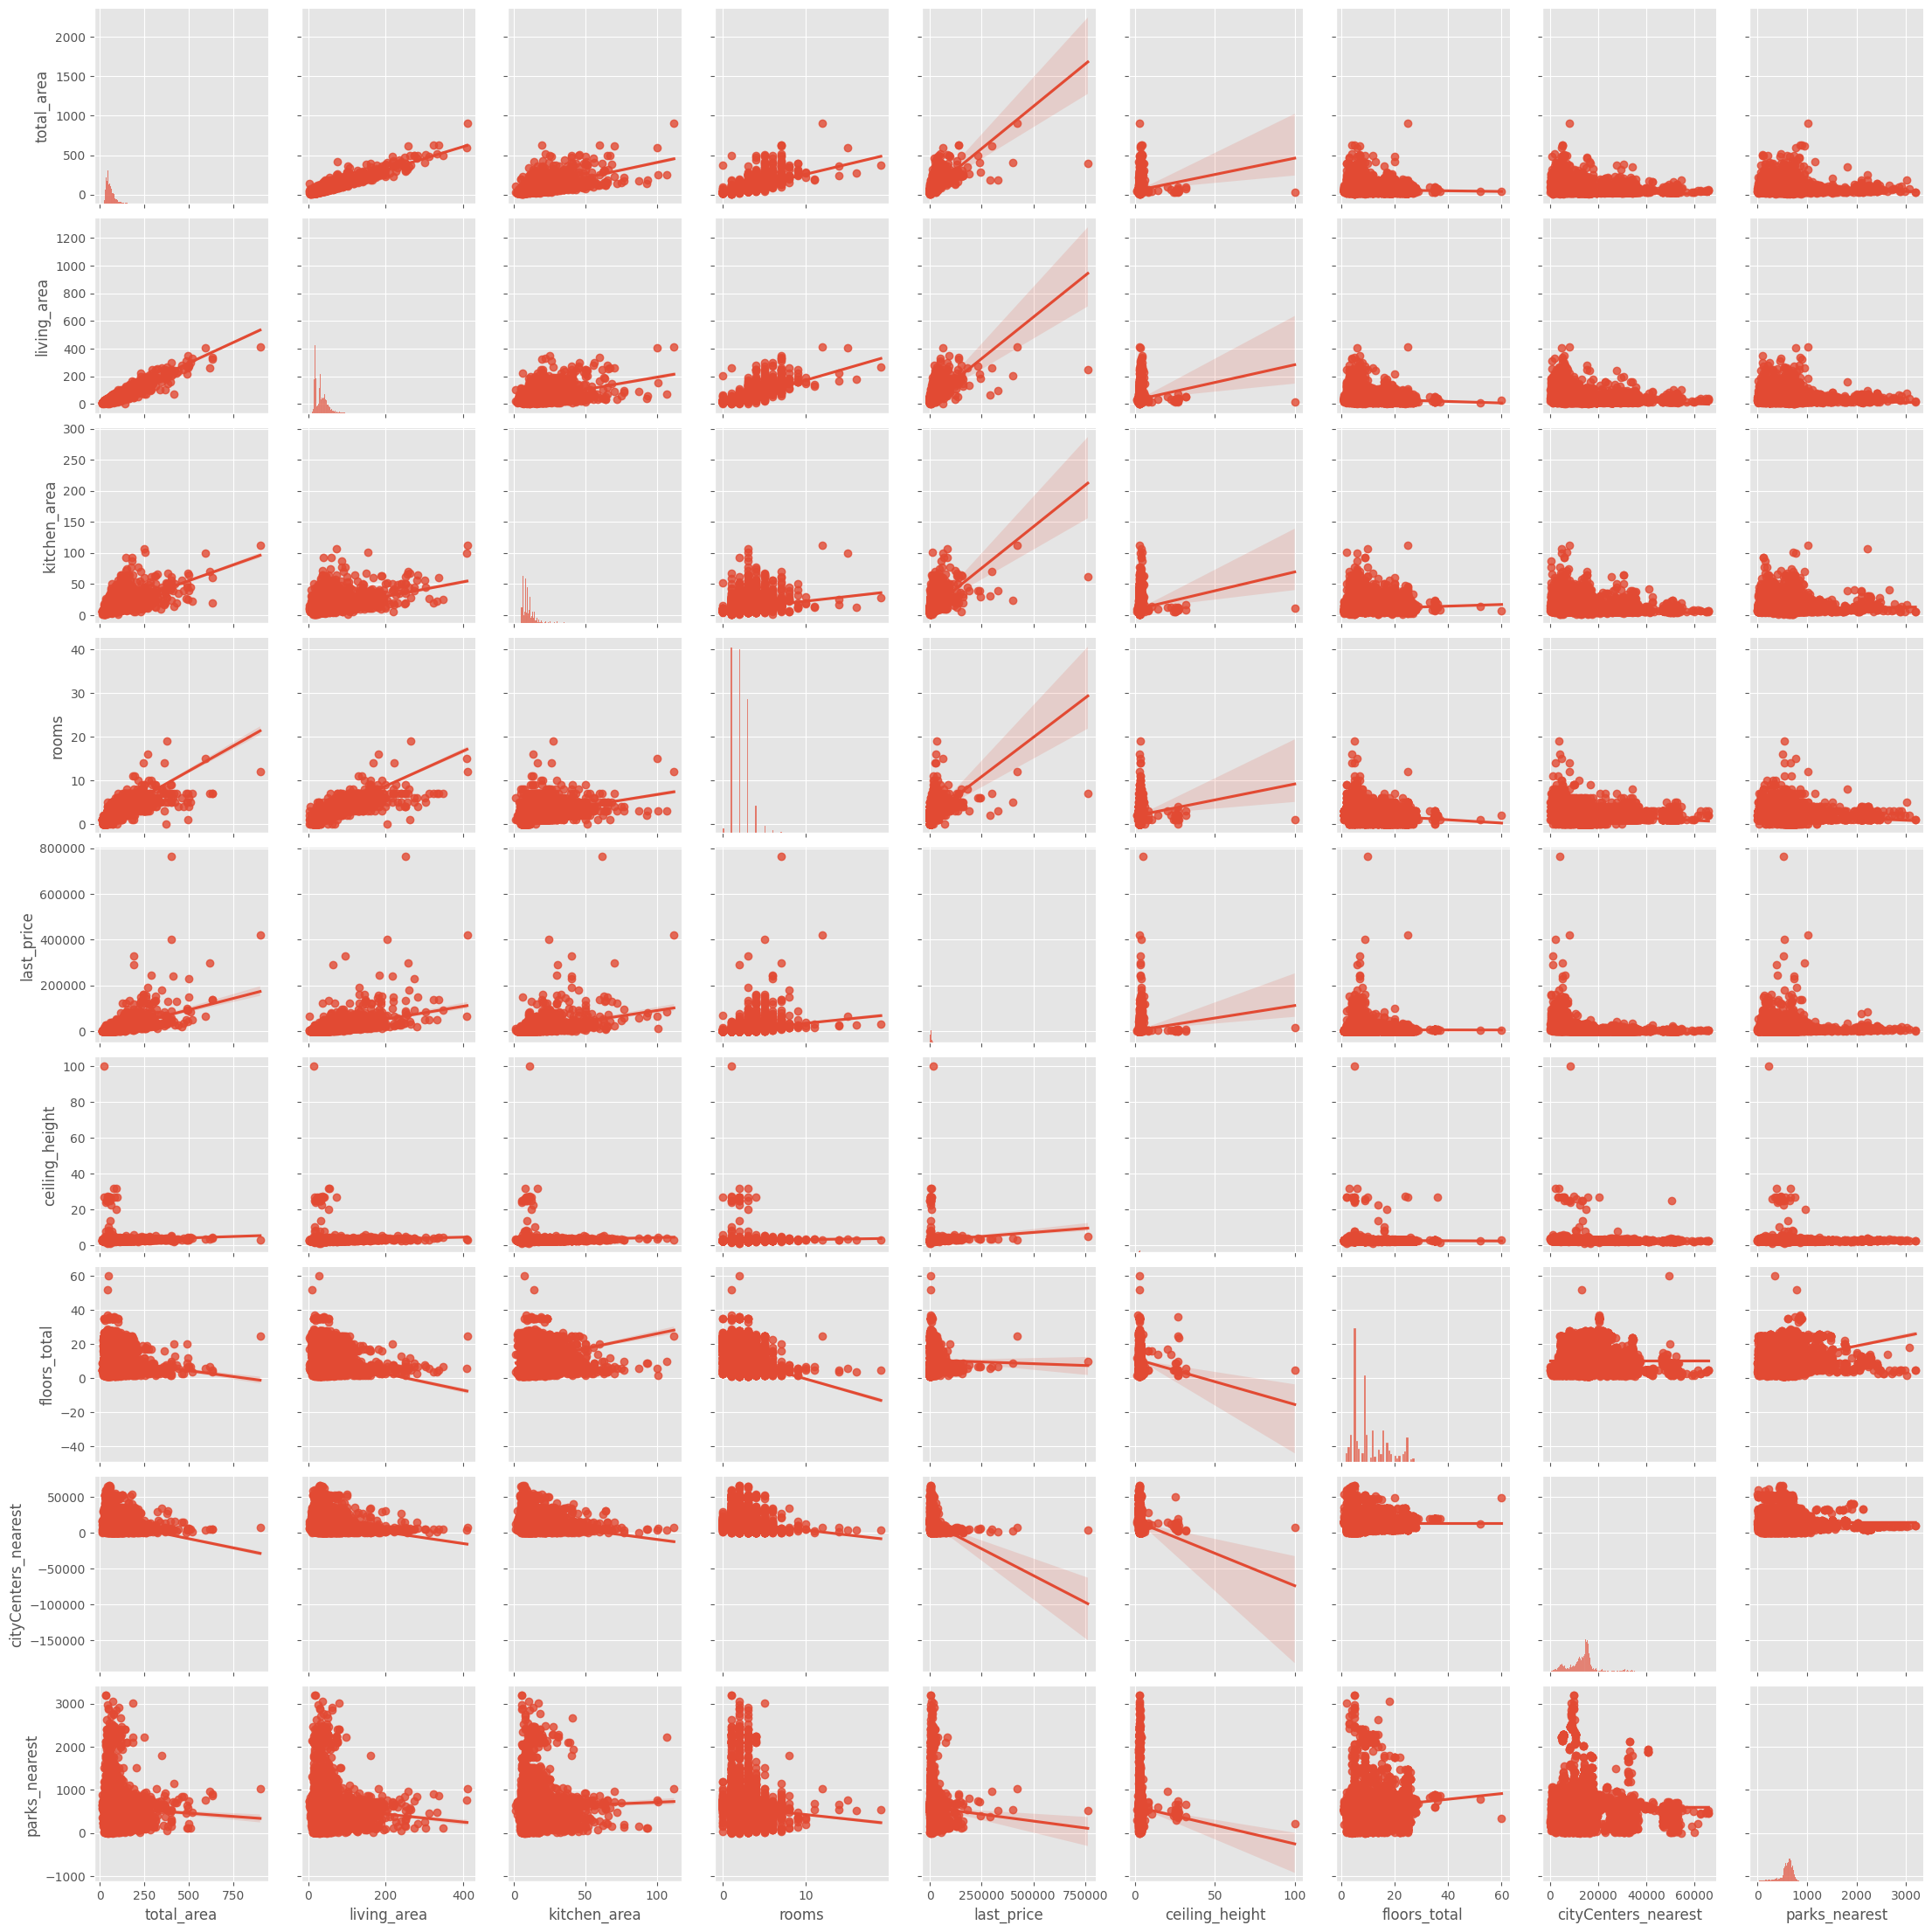

In [46]:
print('Распределение всех числовых данных:')
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df[['total_area', 'living_area',
                'kitchen_area', 'rooms',
               'last_price', 'ceiling_height', 'level',
               'floors_total','cityCenters_nearest',
               'parks_nearest']],
             kind="reg")
plt.show()

**Изучите, как быстро продавались квартиры (столбец days_exposition)**

count    23699.000000
mean       182.163636
std        205.168243
min          1.000000
25%         45.000000
50%        124.000000
75%        219.000000
max       1580.000000
Name: days_exposition, dtype: float64

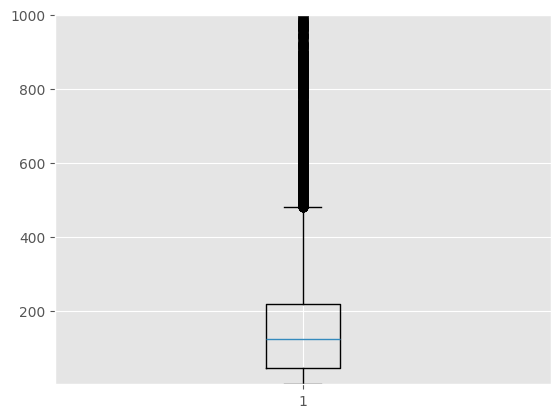

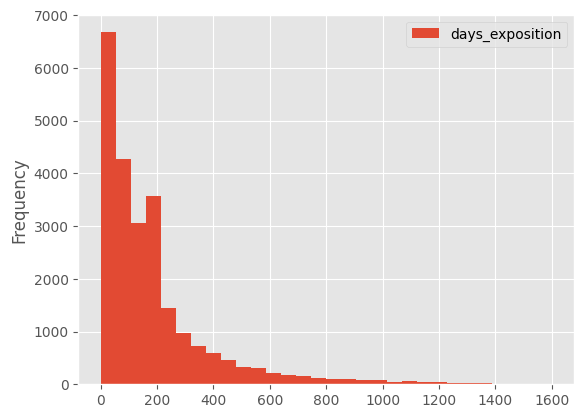

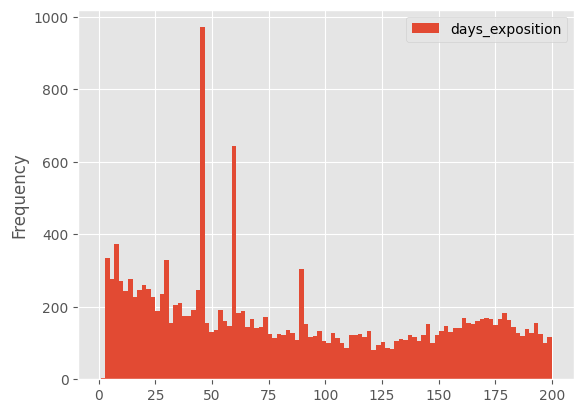

In [47]:
#диаграмма размаха
plt.boxplot(df[df['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

#среднее значение, медиана и межквартильный размах
df[df['days_exposition']!=0]['days_exposition'].describe().T

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тут надо добавить пару слов о том, что выбивающиеся значения тут не просто так появились. 
    
    
    
UPD: Вижу, что чуть ниже ты добавил

**Мы имеем распределение Пуассона. Среднее - 180 дней, а медиана - 95 дней. Сделав гистограмму со значениями от 0 до 200 с кол-вом корзин 100, у нас аномалии на 45, 60,  днях - это наиболее популярное количество дней до снятия объявления.**

<Axes: >

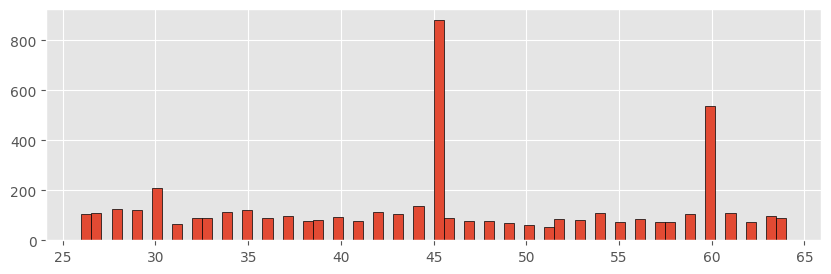

In [48]:
df.query('25<days_exposition<65')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black')

**По правилам Яндекс.Недвижимости объявления автоматически снимаются с публикции как раз на 45й и 60й день, в зависимости от типа. Я бы удалил эти выбросы**

**Исходя из метода describe, межквартильный размах - от 45 до 232 дней, исходя же из метода boxplot - диаграмма размаха у нас от минимального значения до примерно 500 дней, долгие - от 500 дней и выше, нормальные значения - от 1 до 500.**

**Величина коэффициента корреляции отражает силы связи. При оценке силы связи коэффициентов корреляции используется шкала Чеддока:***


**Таблица анализа силы связи между переменными**

 Значение:
 1. от 0 до 0,3 (очень слабая), 
 2. от 0,3 до 0,5 (слабая),
 3. от 0, 5 до 0,7 (средняя),
 4. от 0,7 до 0, 9	(высокая),
 5. от 0,9 до 1	(очень высокая).

**Факторы, которые больше всего влияют на общую (полную) стоимость объекта**

0.6536750984527504

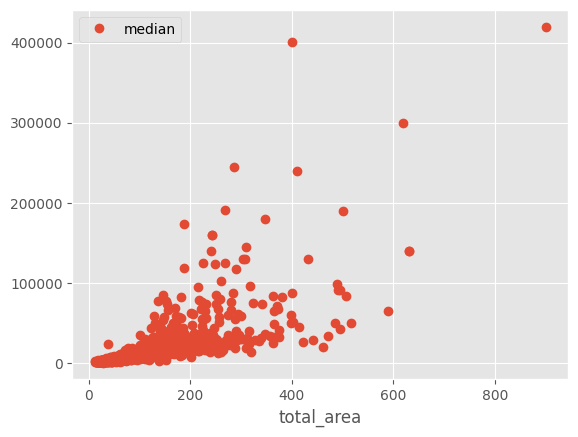

In [49]:
pivot_table_total_area = df.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

df['total_area'].corr(df['last_price'])

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Классные метод использован для показа зависимости на графике. 

**Согласно коэффициента Пирсона - 0.6! То есть, чем больше площадь выше стоимость!**

**Изучим зависимость цены от жилой площади.**

0.5826628707009266

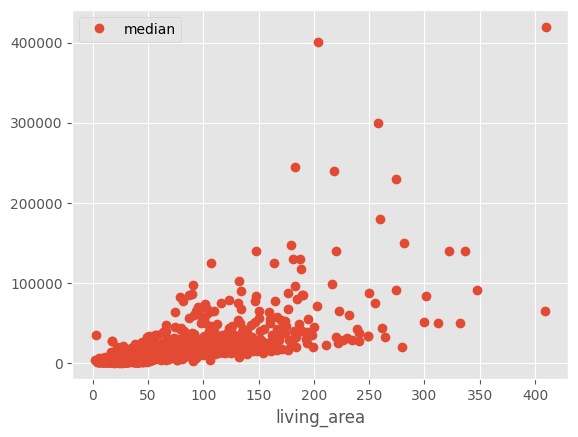

In [50]:
pivot_table_living_area = df.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_living_area.columns = ['mean', 'count', 'median']
pivot_table_living_area.plot(y = 'median', style = 'o')

pivot_table_living_area.sort_values('median', ascending = False)

df['living_area'].corr(df['last_price'])

**Согласно коэффициента Пирсона - 0.58! То есть, чем больше жилая площадь выше стоимость!**

**Изучим зависимость цены от площади кухни.**

0.5017440916610031

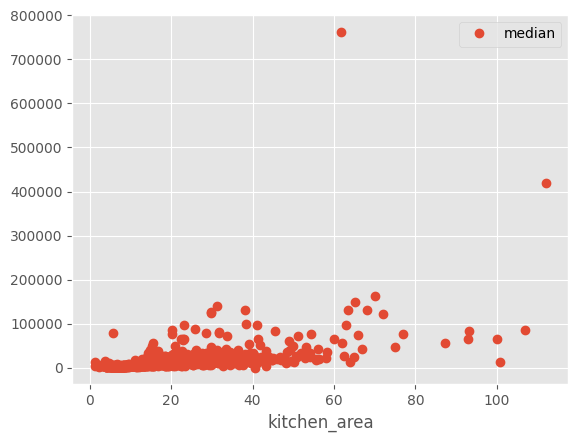

In [51]:
pivot_table_kitchen_area = df.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_kitchen_area.columns = ['mean', 'count', 'median']
pivot_table_kitchen_area.plot(y = 'median', style = 'o')

pivot_table_living_area.sort_values('median', ascending = False)

df['kitchen_area'].corr(df['last_price'])

**Согласно коэффициента Пирсона - 0.50! То есть, чем больше площадь кухни не намного выше стоимость!**

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Все так и есть

**Изучим зависимость цены от количество комнат.**

<Axes: >

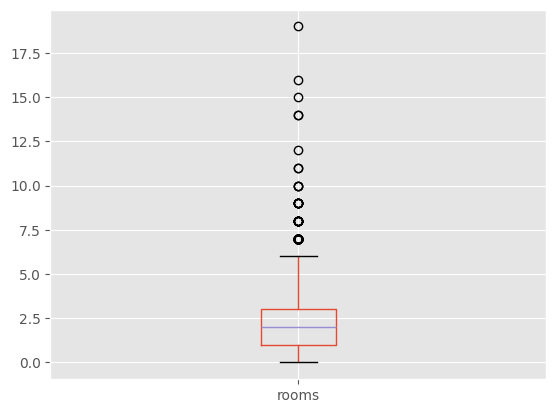

In [52]:
df.boxplot(column='rooms')

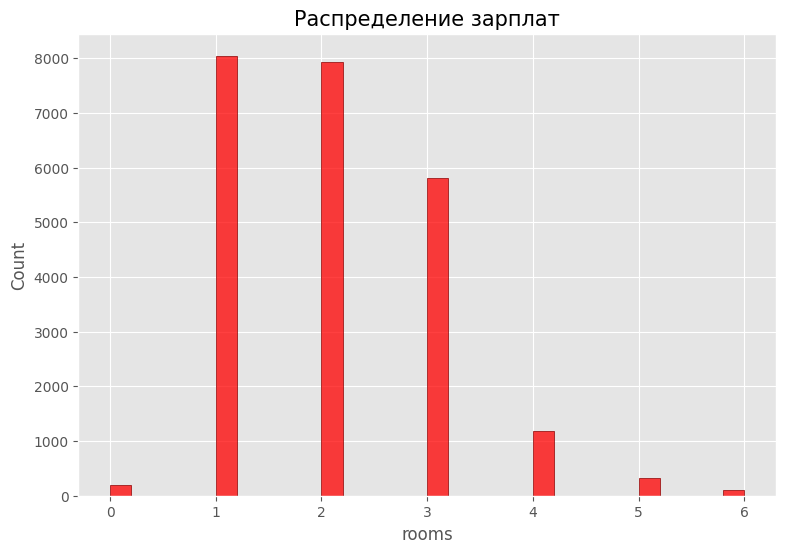

In [53]:
df_rooms = df.query('rooms <= 6')

fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Распределение зарплат', fontsize=15)
sns.histplot(df_rooms.rooms,
             bins=30,
             ax=ax, 
             color='red',
             edgecolor='darkred');

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Распределение по комнатам логически соотносится с распределением по площади  

In [54]:
df['rooms'].corr(df['last_price'])

0.3633428939020417

**Чем больше комнат не намного выше стоимость, но мы видим порог в три комнаты, далее идет снмжение цены, связи по Пирсону слабые**

**Изучим зависимость цены от высоты потолков.**

0.09957290247601548

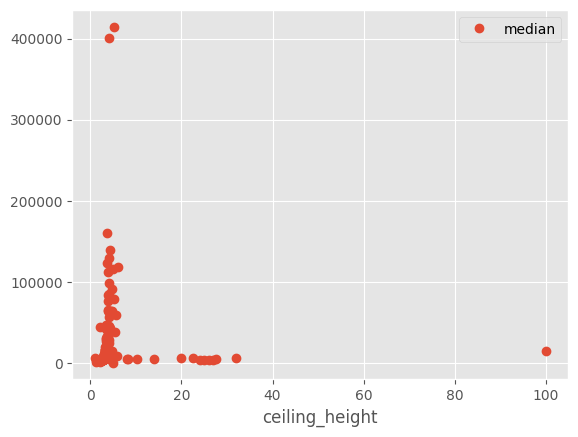

In [55]:
pivot_table_ceiling_height = df.pivot_table(index = 'ceiling_height', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_ceiling_height.columns = ['mean', 'count', 'median']
pivot_table_ceiling_height.plot(y = 'median', style = 'o')

pivot_table_ceiling_height.sort_values('median', ascending = False)

df['ceiling_height'].corr(df['last_price'])

**Зависимость цены от высоты потолков, очень слабая.**

**Изучим зависимость цены от тип этажа квартиры («первый», «последний», «другой»).**

In [56]:
level_floor = df.pivot_table(index = 'level', values='last_price', aggfunc = ('median', lambda X:
                                                                       X.count()))
def percent(x):
    return "{0:.2%}".format(x)

level_floor['median'] = level_floor['median'].apply(percent)
level_floor = level_floor.rename(columns={"<lambda_0>": "Количество записей", "mean": "Медиана по этажам"})
level_floor.sort_values(by='Количество записей', ascending=False)

Количество записей      median
level                                    
другой                  17446  485000.00%
последний                3361  430000.00%
первый                   2892  390000.00%

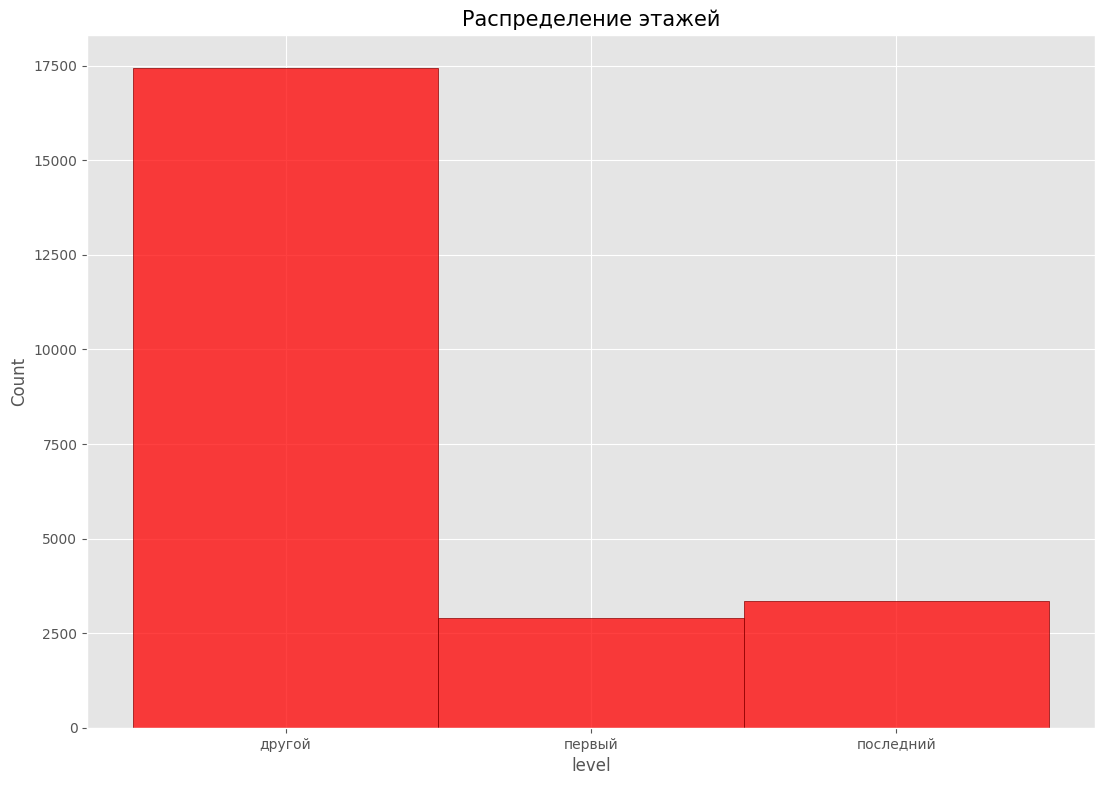

In [57]:
fig, ax = plt.subplots(figsize=(13, 9))
ax.set_title('Распределение этажей', fontsize=15)
sns.histplot(df.level,
             bins=30,
             ax=ax, 
             color='red',
             edgecolor='darkred', binwidth=0.05);

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Квартиры на первом этаже пользуются меньшим спросом

**Перрвый этаж всегда чуть дешевле других, так же стоймость меньше на последних этажах**

**Изучим зависимость цены от общего количества этажей в доме.**

-0.006944885137065541

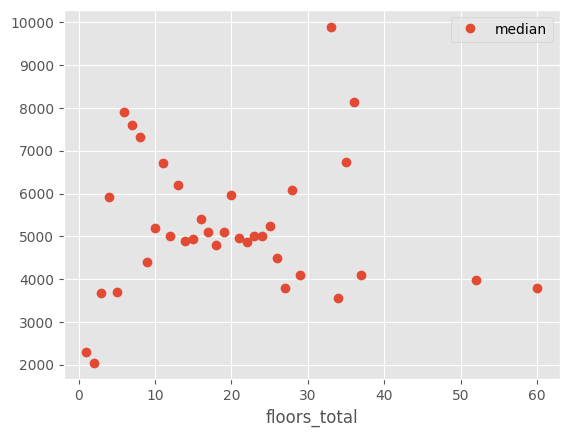

In [58]:
pivot_table_floors_total = df.pivot_table(index = 'floors_total', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floors_total.columns = ['mean', 'count', 'median']
pivot_table_floors_total.plot(y = 'median', style = 'o')

pivot_table_floors_total.sort_values('median', ascending = False)

df['floors_total'].corr(df['last_price'])

**Зависимость цены от общего количества этажей в доме близка к 0, интересно, но от количества этажей не зависит цена.**

**Изучим зависимость цены от даты размещения (день недели, месяц, год)**

mean  count  median
day                            
1    6394.234282   4183  4730.0
2    6627.970055   3974  4700.0
0    6511.614341   3612  4650.0
3    6708.664028   4295  4650.0
4    6372.130250   4000  4585.0
5    6976.802169   1936  4555.0
6    6246.178340   1699  4550.0

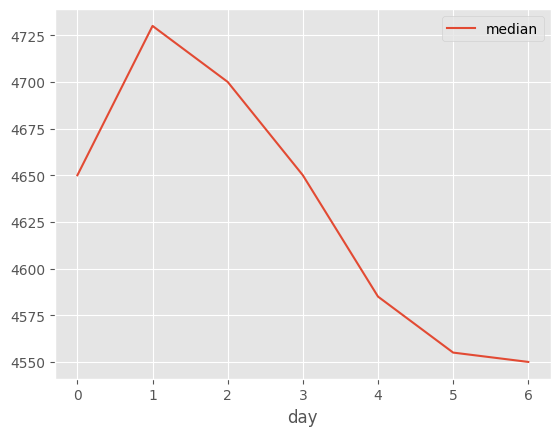

In [59]:
pivot_table_weekday_exposition = df.pivot_table(index = 'day', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
В выходные дни люди публикуют квартиру с наименьшей стоимостью

**Видим, что чем ближе ко вторнику выставлены объявления тем в среднем выше стоимость, но незначительно! По субботам стоимость самая низкая., стоимость выставленной на продажу недвижимости зависит от общей активности людей, так как именно в рабочие дни мы видим более высокие цены, хотя в понедельник люди в шоке от начала рабочей недели и в общем не активно выставляют объявления, как и в среду.**



mean  count  median
month                            
4      6737.199664   2379  4800.0
9      6825.470469   1981  4700.0
11     6461.362294   2371  4700.0
12     7011.731871   1641  4700.0
2      6468.499242   2640  4650.0
3      6359.274449   2587  4650.0
7      6649.335693   1695  4650.0
1      6668.233333   1500  4600.0
8      6350.234518   1744  4570.0
10     6235.015045   2127  4570.0
5      6600.434066   1274  4515.0
6      6310.269318   1760  4400.0

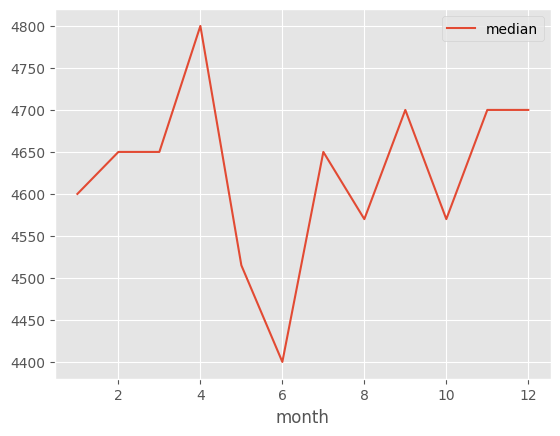

In [60]:
pivot_table_month_exposition = df.pivot_table(index = 'month', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

**Cамая высокая стоимость метра в апреле и августе, самая низкая стоимость в мае и июне. На рынке присутствует сезонность - в начале лета мы видим наименьшее предложение как по количеству, так и по стоимости недвижимости. Наверное, это связано с отпусками, август традиционно самый дорогой месяц лета, так по всей России, но стабильность в ценах поддерживают рабочие поездки, семинары и.т.д.**

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
С выводом согласен 

mean  count  median
year                             
2014  12087.138686    137  7700.0
2015   8572.832914   1191  5350.0
2019   6782.389024   2879  5050.0
2016   6827.912325   2783  4550.0
2018   5950.966193   8519  4550.0
2017   6585.729426   8190  4500.0

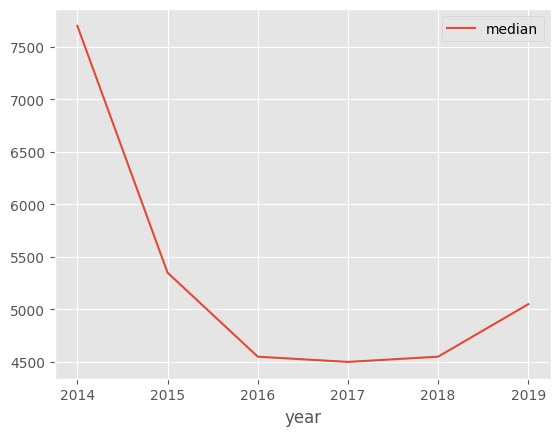

In [61]:
pivot_table_year_exposition = df.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

**C 2014 до 2016 года цена падала, можно связать это с кризисом 14-го года и его остаточным эффектам, кроме того, возможны изменения в рынке найма жилья, многие с 16 начали работать в измененных законодательством условиям. В целом годовые пики сложно анализировать, эта выборка не репрезентативная, в целом мы не знаем пиков до и после. Стоимость аналогичных квартир могла себя вести абсолютно иначе от года к году**

**Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

In [62]:
top10 = df['locality_name'].value_counts().index.tolist()[:10]
mean10_metrics = [df[df['locality_name'] == city]['price_of_m2'].median() for city in top10]
mean10_prices = [df[df['locality_name'] == city]['last_price'].median() for city in top10]
frame = {'Город': top10,
         'Средняя цена за кв.м., тыс. руб.': mean10_metrics, 
         'Средняя цена за квартиру, тыс. руб.': mean10_prices}
df_top10 = pd.DataFrame(frame).sort_values(by='Средняя цена за кв.м., тыс. руб.', ascending=False)
df_top10

Город  Средняя цена за кв.м., тыс. руб.  \
0    санкт-петербург                          104.7610   
4             пушкин                          100.0000   
8    деревня кудрово                           91.8600   
6  посёлок парголово                           91.6420   
1     посёлок мурино                           85.8780   
2     посёлок шушары                           76.8760   
5            колпино                           74.7235   
7            гатчина                           67.7960   
3         всеволожск                           65.7890   
9             выборг                           58.1580   

   Средняя цена за квартиру, тыс. руб.  
0                               5500.0  
4                               5180.0  
8                               3790.0  
6                               4100.0  
1                               3400.0  
2                               3950.0  
5                               3600.0  
7                               3100.0  
3                               3450.0  
9                               2897.0

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Рейтинг топ-10 по городам получен

**Cамые дорогие квартиры в Санкт-Петербурге и парковом городе Пушкине. Чем дальше от города, тем дешевле. В Выборге средняя цена за квадратный метр в 2 раз ниже, чем в Санкт-Петербурге.**

**Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра**

In [63]:
df_spb = df.query('locality_name == "санкт-петербург"')
df_spb.head(5)

total_images  last_price  total_area first_day_exposition  rooms  \
0          20.0       13000       108.0           2019-03-07    3.0   
2          10.0        5196        56.0           2015-08-20    2.0   
3           0.0       64900       159.0           2015-07-24    3.0   
4           2.0       10000       100.0           2018-06-19    2.0   
7           5.0        7915        71.6           2019-04-18    2.0   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  year  \
0            2.70            16        51.00    8.0             0  ...  2019   
2            2.82             5        34.30    4.0             0  ...  2015   
3            3.41            14        93.22    9.0             0  ...  2015   
4            3.03            14        32.00   13.0             0  ...  2018   
7            2.81            24        34.05   22.0             0  ...  2019   

   month  day   level living_area_part  kitchen_area_part  \
0      3    3  другой             0.47               0.23   
2      8    3  другой             0.61               0.15   
3      7    4  другой             0.59               0.15   
4      6    1  другой             0.32               0.41   
7      4    3  другой             0.48               0.26   

   cityCenters_nearest_km  parks_nearest_km  ponds_nearest_km  \
0                  16.028          0.482000          0.755000   
2                  13.933          0.090000          0.574000   
3                   6.800          0.084000          0.234000   
4                   8.098          0.112000          0.048000   
7                  11.634          0.728241          0.680497   

   airports_nearest_km  
0               18.863  
2               21.741  
3               28.098  
4               31.856  
7               23.982  

[5 rows x 33 columns]

price_of_m2
cityCenters_nearest_km             
0                        187.323674
1                        166.603312
2                        147.165542
3                        129.415892
4                        137.801788
5                        147.127436
6                        152.277455
7                        141.399287
8                        120.523957
9                        110.545348
10                       112.039668
11                       107.182948
12                       108.529840
13                       107.296622
14                       105.214299
15                       102.072605
16                       100.090911
17                        94.095434
18                        94.831529
19                        95.433951
20                       107.045774
21                        91.492221
22                        88.714237
23                        92.720233
24                        82.439909
25                        91.135600
26                        75.171333
27                       132.115000
28                        81.840200
29                        62.481667

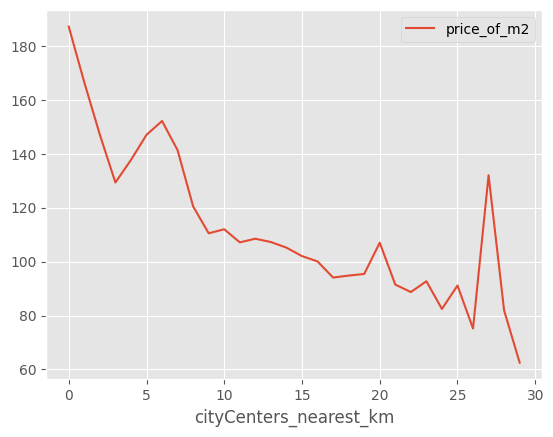

In [64]:
df_spb['cityCenters_nearest_km'] = df_spb['cityCenters_nearest_km'].astype('int32')
#добавил
pivot_table_cityCenters_nearest_km = df_spb.pivot_table(index = 'cityCenters_nearest_km', values = 'price_of_m2', aggfunc = 'mean')
pivot_table_cityCenters_nearest_km.plot()
pivot_table_cityCenters_nearest_km

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Тут надо сделать чуть иначе. Надо сперва посчитать среднюю стоимость для каждого целого значения км а потом по этим значениям вывести график. Тебе так проще будет разобраться. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
А теперь хороший и понятный график вышел. 

**Исправил**

### Напишите общий вывод

**Заменил пропущенные значения там, где это необходимо, заменил типы данных на необходимые для удобной работы. Посчитал и добавил в таблицу цену квадратного метра жилья, вывел даты, дни недели, месяцы и года размещения объявлений, добавил категории по этажам квартир. Изучил следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах. Изучая время продажи квартир: большое количество объявлений было автоматически снято с Яндекс Недвижимость и дату из снятия нельзя считать датой продажи квартиры, поэтому, изучая средние и медианные сроки продажи квартир - данные значения нужно не учитывать. При помощи диаграммы размаха, поняли нормальные значения продажи квартир варьируются от 1 до 500 дней. Мы выявили, что на стоимость квартиры больше всего влияют: общая площадь, жилая площадь, количество комнат (до 3 комнат), этаж квартиры, близость к центру. Незначительно на стоимость влияют день, месяц, год размещения. В 2016-2017 годах стоимость квартир в среднем по рынку была ниже на 10-20 %, тогда как в центре Санкт-Петербурга данной зависимости не обнаружено. В целом из открытых источников знаем, что элитная недвижимость всегда росла в цене, и пережила многие кризисы и нестабильности на рынке. Судя, по резкости изменения цен в зависимости от удаления от центра СПБ, мы выявили центр города в радиусе 3-4 километров.**

**Рассматривая среднюю стоимость квартир в 2014-2019 годах, мы не делали сегментацию рынка, а лишь смотрели средние показатели по рынку в целом, возможно, цены на  квартиры в разных годах страны вели себя по-разному, например: средняя стоимость метра по рынку в 2016-2017 годах была наиболее низкой, но аналогичные прошлым годам квартиры могли и не падать в цене! Косвенно об этом говорят данные, при изучении сегмента квартир - находящихся в радиусе 3-4 км в центре СПБ (элит. недвиж).**

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Итоговый вывод стал классным дополнением к проекту. С такими данными мы точно сможем составить антифри=од-систему сервиса Недвижимости. Я уверен, у нас не будет никаких проблем. 

<div class="alert alert-block alert-info">

## Итоговый комментарии от ревьюера:
    
#### Успех

Спасибо большое тебе за такую качественную работу. Мне было приятно проверять проект и делиться обратной связью. Особенно впечатлила Предобработка данных. Все достаточно структурировано и последовательно. Ты применяешь верные навыки для работы с кодом. Еще хочу отметить понятные и информативные графики. Однако, в проекте есть несколько замечаний, которые надо исправить:

* Промежуточные выводы добавить. 
* Подправить некоторые графики.  
* Переделать график нахождения зависимости цены от центра СПБ.

       
Еще я оставил рекомендации. Очень надеюсь, что ты учтешь их в этом и последующих проектах.
       
Жду проект после доработки. Уверен, ты справишься.
</div>

<div class="alert alert-block alert-success">
 
# Итоговый Комментарий ревьюера ver.2 
    
#### Успех
    
Благодарю тебя за доработку проекта. Вот теперь я готов принять его. От себя я хочу пожелать успехов в дальнешей учебе. Ты точно справишься, я уверен в этом. 

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [ ]  В конце проекта сделан общий вывод.